In [19]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [12]:
summary = pd.read_csv("../data/rescuetime_summary.csv")
# if exists remove old index columns
summary.drop(['Unnamed: 0'], axis=1, inplace=True)
# relabel date to timestamp
# put the time column as the index
summary.set_index('date', inplace=True)
summary = summary.reindex(index=summary.index[::-1])
summary

,productivity_pulse,very_productive_percentage,productive_percentage,neutral_percentage,distracting_percentage,very_distracting_percentage,all_productive_percentage,all_distracting_percentage,uncategorized_percentage,business_percentage,...,business_duration_formatted,communication_and_scheduling_duration_formatted,social_networking_duration_formatted,design_and_composition_duration_formatted,entertainment_duration_formatted,news_duration_formatted,software_development_duration_formatted,reference_and_learning_duration_formatted,shopping_duration_formatted,utilities_duration_formatted
date,,,,,,,,,,,,,,,,,,,,,
2023-10-10,81,70.0,9.4,7.4,2.4,10.8,79.4,13.2,3.0,0.1,...,42s,23m 22s,46m 39s,7m 1s,23m 13s,no time,7h 19m,39m 45s,1m 54s,45m 22s
2023-10-11,68,57.2,10.2,6.1,1.9,24.5,67.5,26.4,4.1,0.0,...,16s,12m 1s,4m,57m 24s,2h 7m,1m 6s,3h 57m,1h 1m,1m 3s,21m 48s
2023-10-12,87,76.9,9.0,7.6,0.0,6.6,85.8,6.6,6.3,0.2,...,1m 26s,2m 38s,11s,17m 36s,44m 47s,3m 17s,8h 20m,1h 40m,19s,18m 32s
2023-10-13,71,58.3,9.9,10.7,3.3,17.8,68.2,21.1,7.9,0.3,...,2m 4s,31m 38s,58m 14s,21m 1s,1h 21m,1m 55s,6h 41m,1h 8m,no time,30m 38s
2023-10-14,74,57.8,11.5,14.9,1.7,14.1,69.3,15.8,13.4,0.2,...,56s,8m 56s,9m 6s,no time,55m 4s,6m 5s,4h 19m,1h 15m,no time,15m 8s
2023-10-15,60,42.1,15.3,12.0,2.4,28.3,57.3,30.6,8.0,1.1,...,6m 9s,16m 20s,1h 34m,16m 17s,1h 47m,7m 54s,3h 20m,48m 51s,no time,35m 49s
2023-10-16,71,53.5,10.7,17.3,3.8,14.7,64.2,18.4,7.6,0.2,...,51s,30m 9s,32m 6s,1m 29s,43m 45s,2m 3s,4h 25m,54m 57s,11m 33s,1h 1m
2023-10-17,60,37.3,18.7,18.8,1.0,24.2,56.0,25.2,12.0,1.9,...,12m 7s,39m 1s,28m 18s,3m 1s,2h 2m,1m 38s,3h 25m,44m 47s,4m,1h 48m
2023-10-18,71,63.0,4.5,9.3,0.5,22.7,67.5,23.2,3.2,4.8,...,33m 54s,32m 46s,50m 53s,2m 27s,1h 35m,4m 34s,6h 42m,20m 37s,9m 49s,24m 42s


In [21]:
# # change the date column to a datetime object
# datetime.datetime.strptime(summary['utilities_duration_formatted'].values[0], '%H:%M:%S')
# # summary['utilities_duration_formatted'] = datetime.datetime.strptime(summary['utilities_duration_formatted'], '%H:%M:%S')
# # summary

ValueError: time data '45m 22s' does not match format '%H:%M:%S'

In [22]:
summary

,productivity_pulse,very_productive_percentage,productive_percentage,neutral_percentage,distracting_percentage,very_distracting_percentage,all_productive_percentage,all_distracting_percentage,uncategorized_percentage,business_percentage,...,business_duration_formatted,communication_and_scheduling_duration_formatted,social_networking_duration_formatted,design_and_composition_duration_formatted,entertainment_duration_formatted,news_duration_formatted,software_development_duration_formatted,reference_and_learning_duration_formatted,shopping_duration_formatted,utilities_duration_formatted
date,,,,,,,,,,,,,,,,,,,,,
2023-10-10,81,70.0,9.4,7.4,2.4,10.8,79.4,13.2,3.0,0.1,...,42s,23m 22s,46m 39s,7m 1s,23m 13s,no time,7h 19m,39m 45s,1m 54s,45m 22s
2023-10-11,68,57.2,10.2,6.1,1.9,24.5,67.5,26.4,4.1,0.0,...,16s,12m 1s,4m,57m 24s,2h 7m,1m 6s,3h 57m,1h 1m,1m 3s,21m 48s
2023-10-12,87,76.9,9.0,7.6,0.0,6.6,85.8,6.6,6.3,0.2,...,1m 26s,2m 38s,11s,17m 36s,44m 47s,3m 17s,8h 20m,1h 40m,19s,18m 32s
2023-10-13,71,58.3,9.9,10.7,3.3,17.8,68.2,21.1,7.9,0.3,...,2m 4s,31m 38s,58m 14s,21m 1s,1h 21m,1m 55s,6h 41m,1h 8m,no time,30m 38s
2023-10-14,74,57.8,11.5,14.9,1.7,14.1,69.3,15.8,13.4,0.2,...,56s,8m 56s,9m 6s,no time,55m 4s,6m 5s,4h 19m,1h 15m,no time,15m 8s
2023-10-15,60,42.1,15.3,12.0,2.4,28.3,57.3,30.6,8.0,1.1,...,6m 9s,16m 20s,1h 34m,16m 17s,1h 47m,7m 54s,3h 20m,48m 51s,no time,35m 49s
2023-10-16,71,53.5,10.7,17.3,3.8,14.7,64.2,18.4,7.6,0.2,...,51s,30m 9s,32m 6s,1m 29s,43m 45s,2m 3s,4h 25m,54m 57s,11m 33s,1h 1m
2023-10-17,60,37.3,18.7,18.8,1.0,24.2,56.0,25.2,12.0,1.9,...,12m 7s,39m 1s,28m 18s,3m 1s,2h 2m,1m 38s,3h 25m,44m 47s,4m,1h 48m
2023-10-18,71,63.0,4.5,9.3,0.5,22.7,67.5,23.2,3.2,4.8,...,33m 54s,32m 46s,50m 53s,2m 27s,1h 35m,4m 34s,6h 42m,20m 37s,9m 49s,24m 42s


In [33]:
# Define a function to convert a time string to a float of hours
def time_to_hours(time_str):
    if time_str == 'no time':
        return 0.0
    else:
        try:
            time_delta = datetime.datetime.strptime(time_str, '%Hh %Mm') - datetime.datetime(1900, 1, 1)
        except ValueError:
            try:
                time_delta = datetime.datetime.strptime(time_str, '%Mm %Ss') - datetime.datetime(1900, 1, 1)
            except ValueError:
                try:
                    time_delta = datetime.datetime.strptime(time_str, '%Hh') - datetime.datetime(1900, 1, 1)
                except ValueError:
                    try:
                        time_delta = datetime.datetime.strptime(time_str, '%Mm') - datetime.datetime(1900, 1, 1)
                    except ValueError:
                        time_delta = datetime.datetime.strptime(time_str, '%Ss') - datetime.datetime(1900, 1, 1)
        return time_delta.total_seconds() / 3600.0

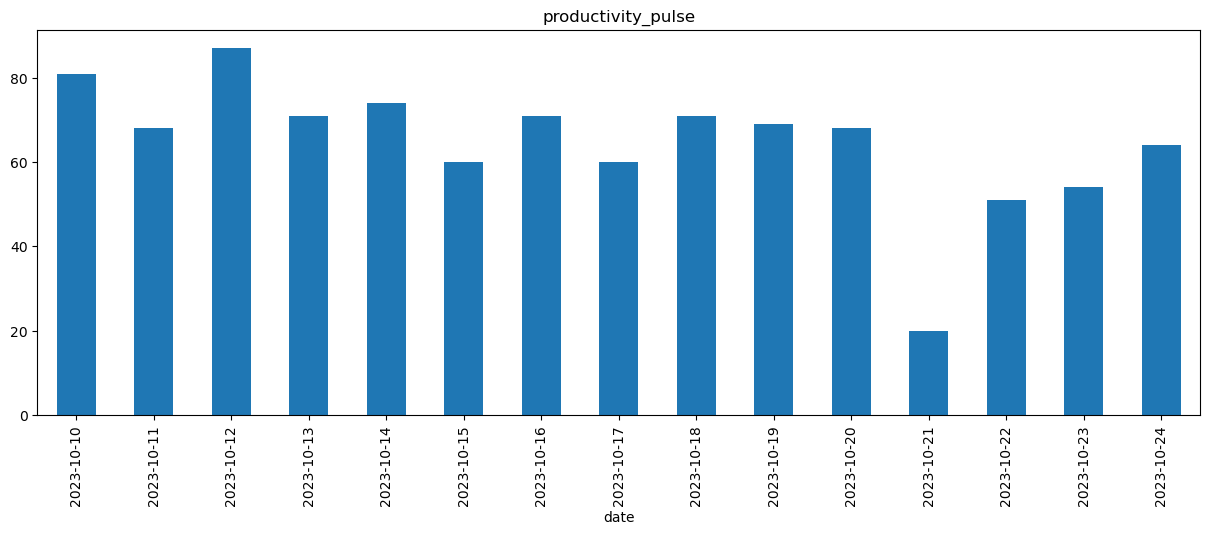

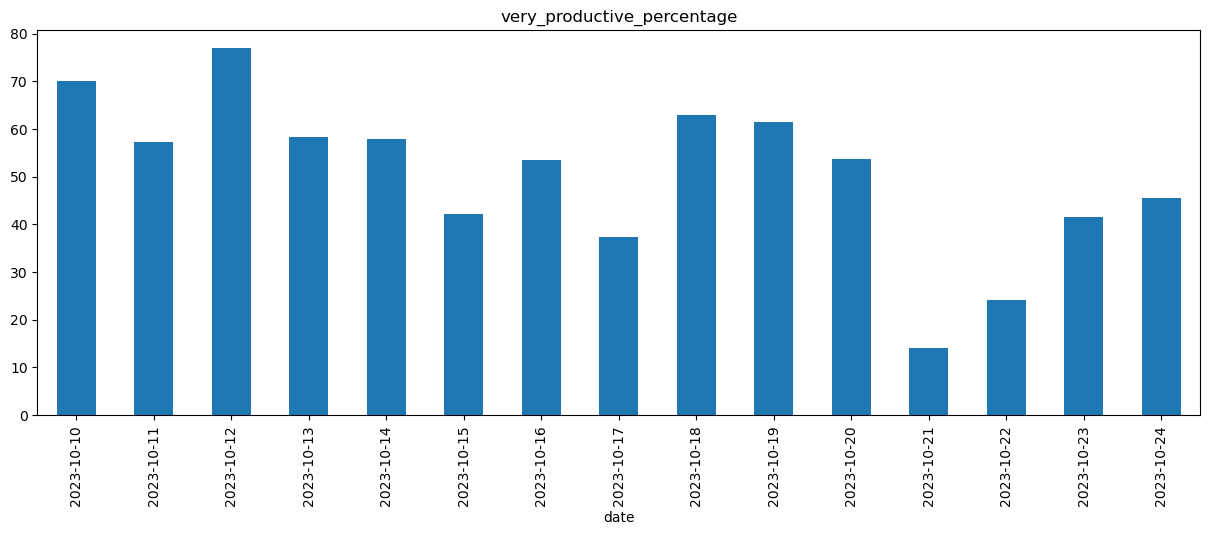

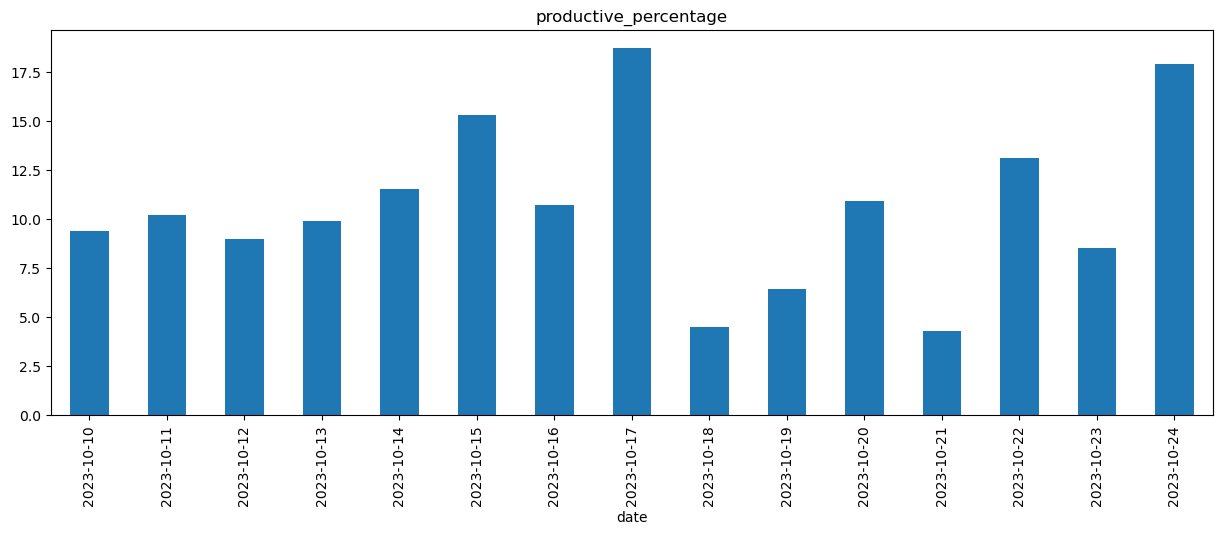

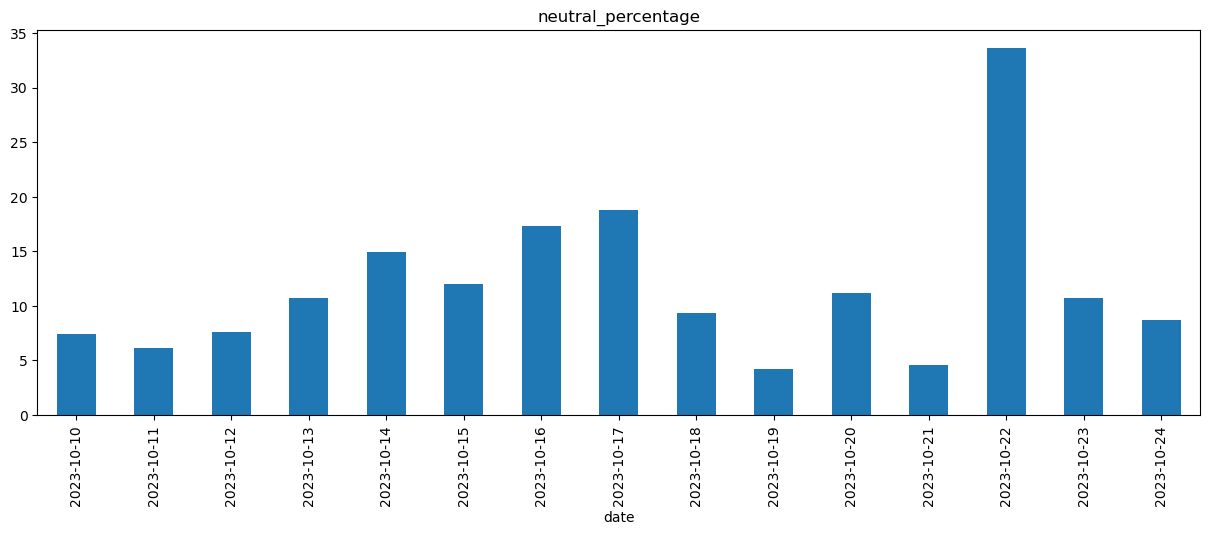

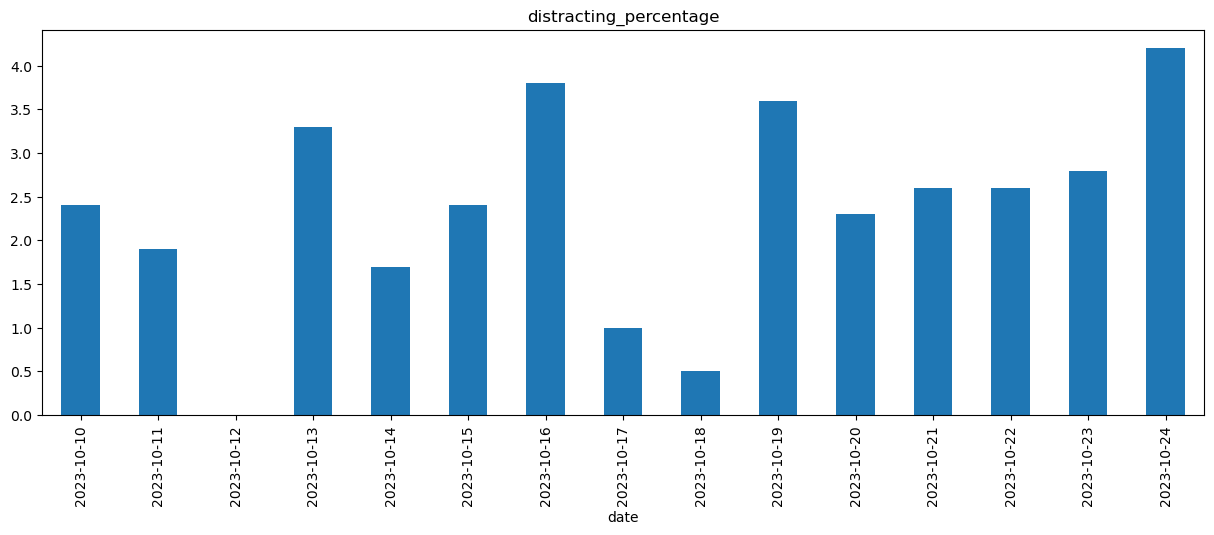

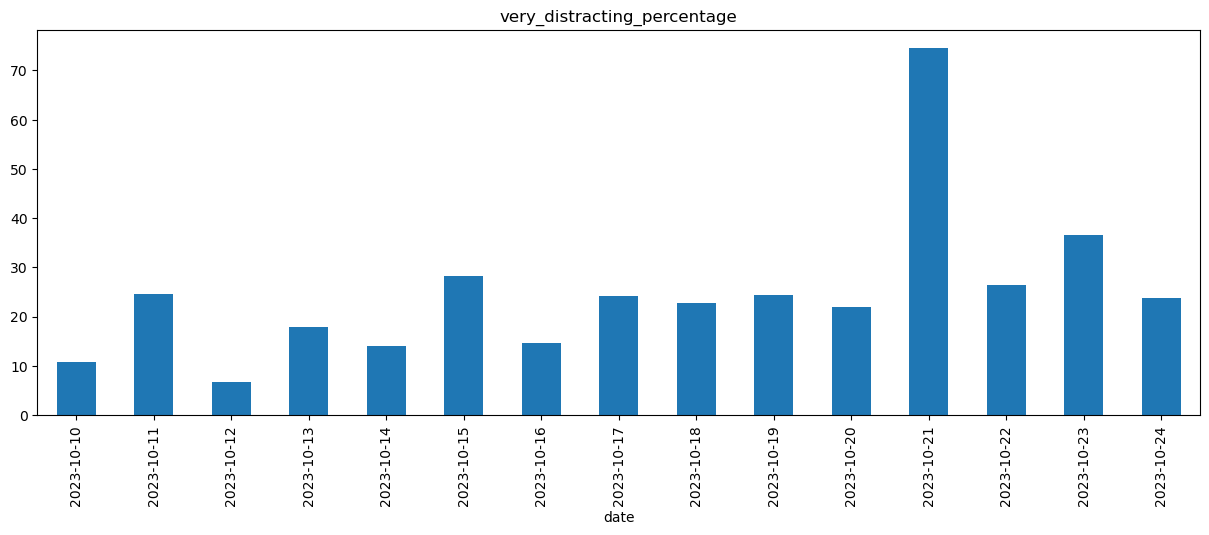

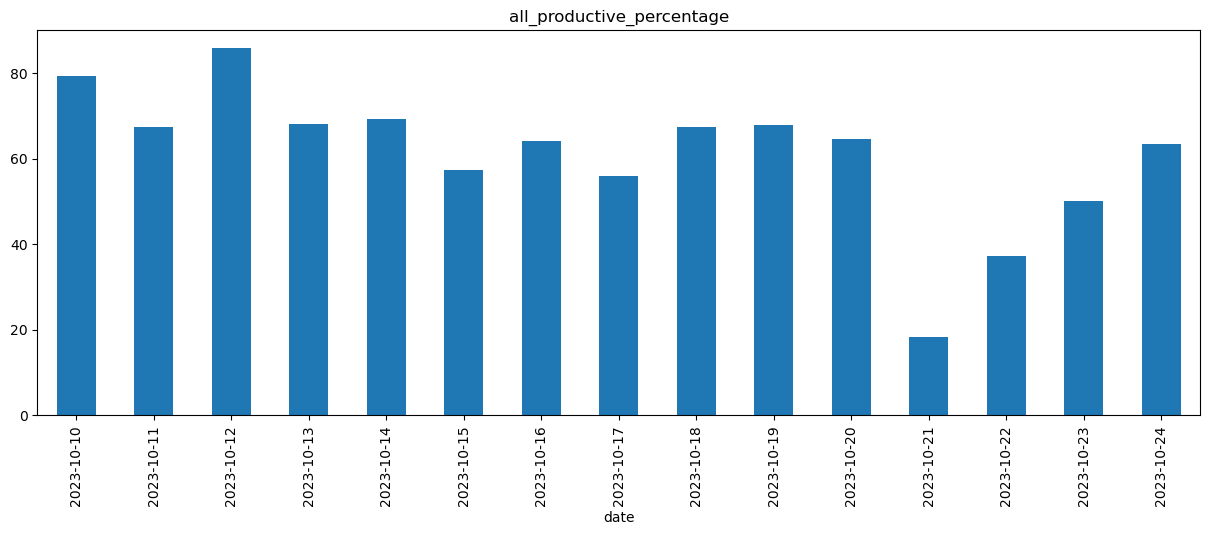

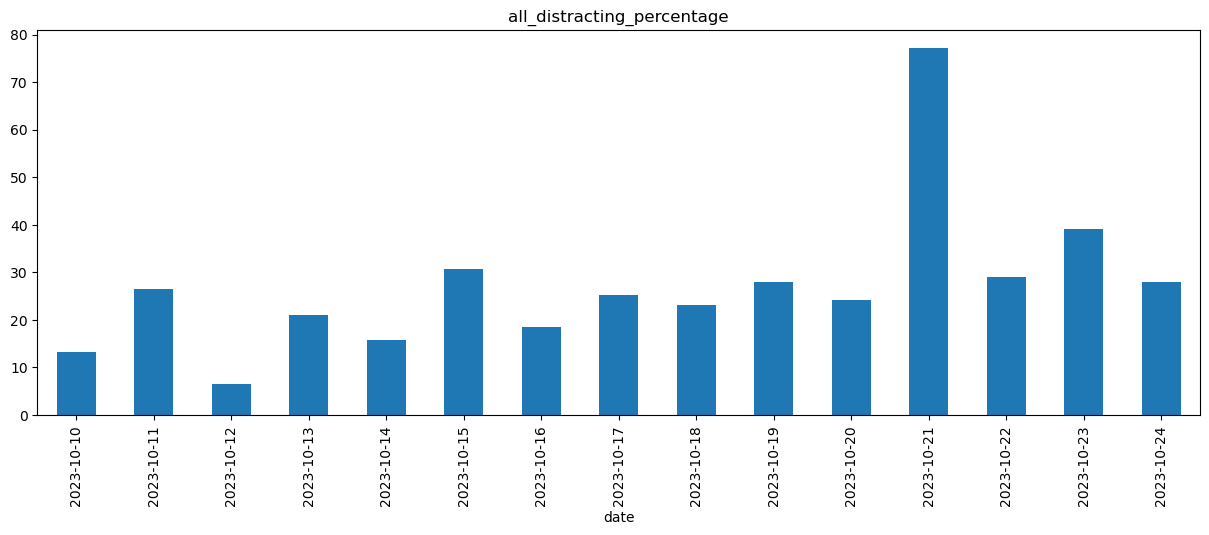

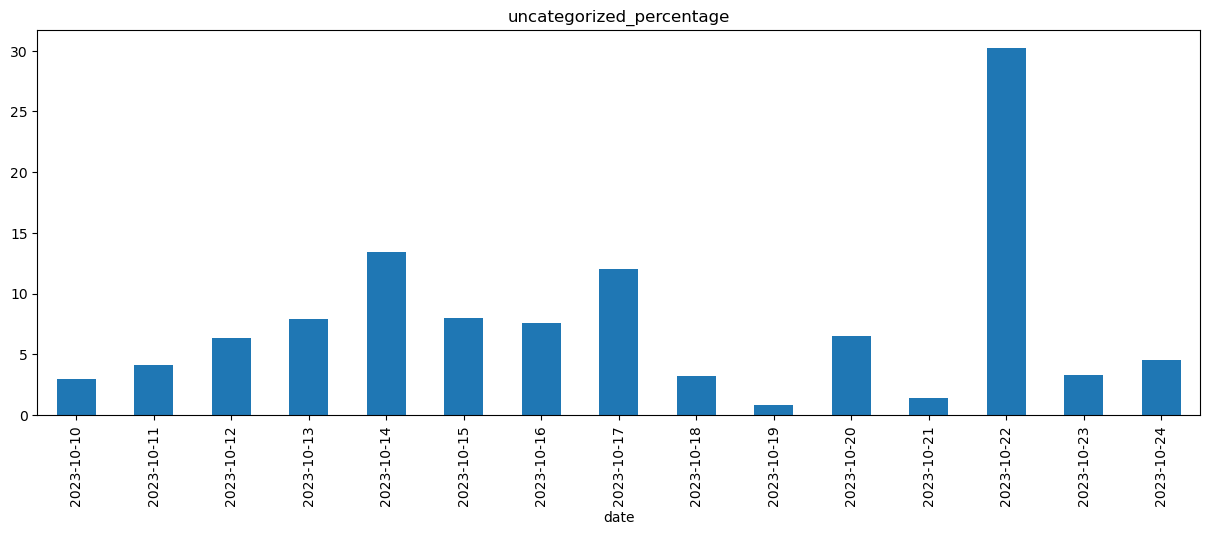

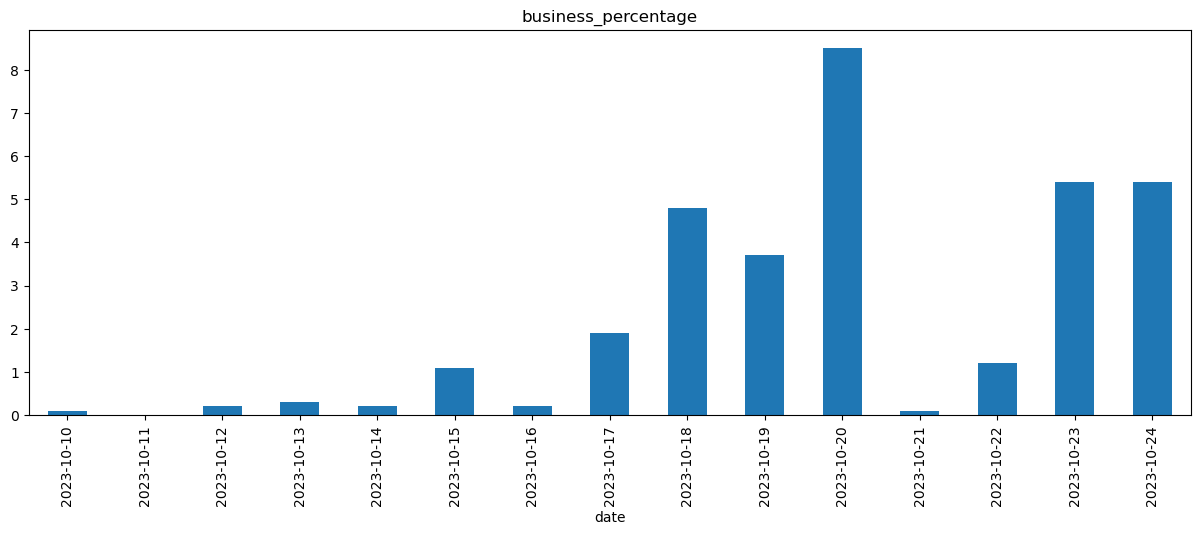

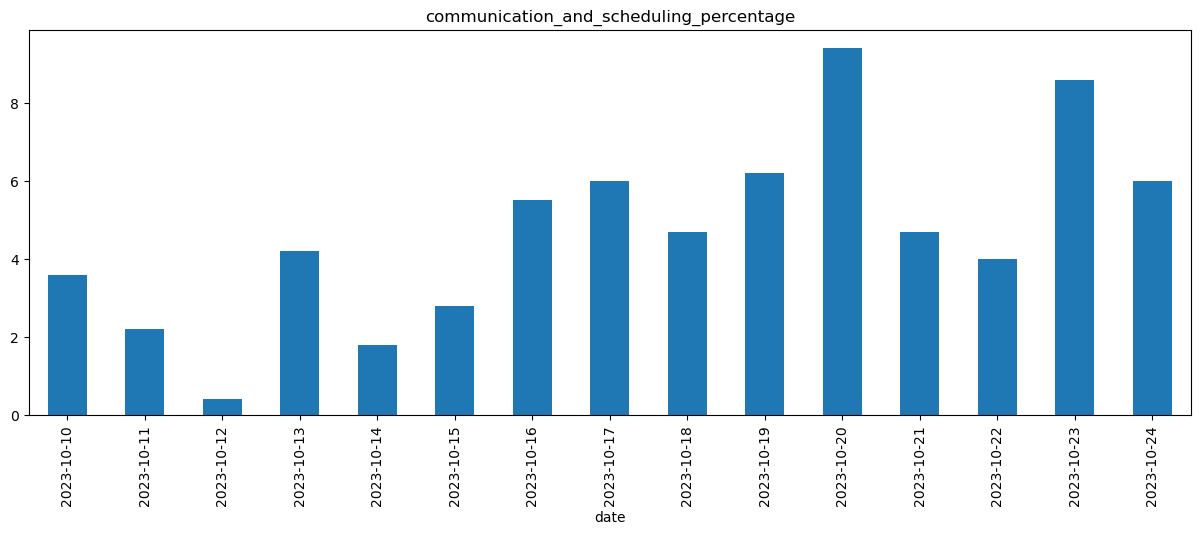

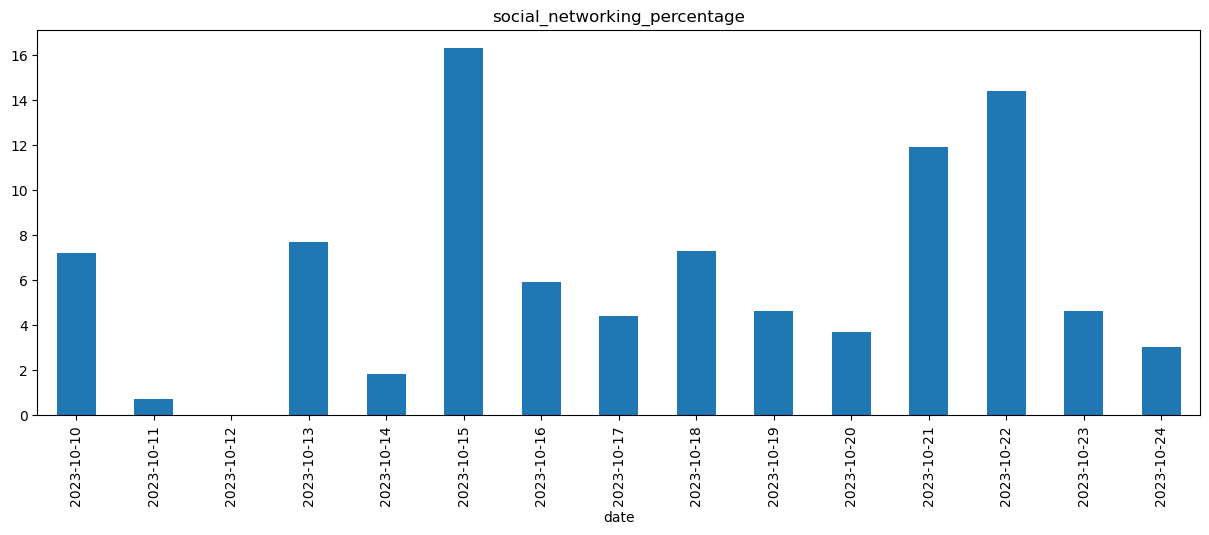

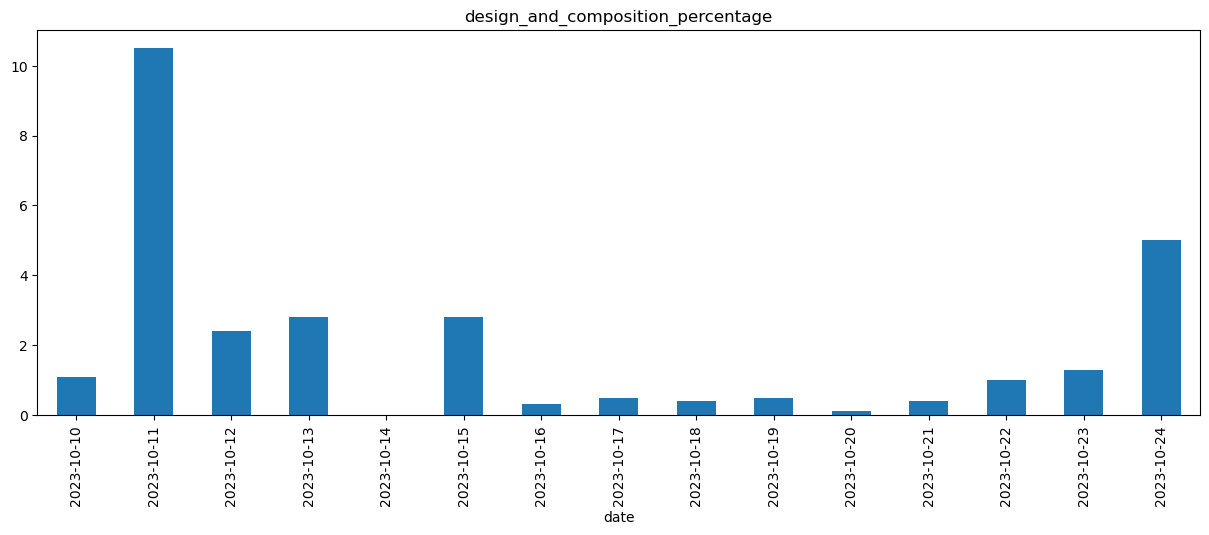

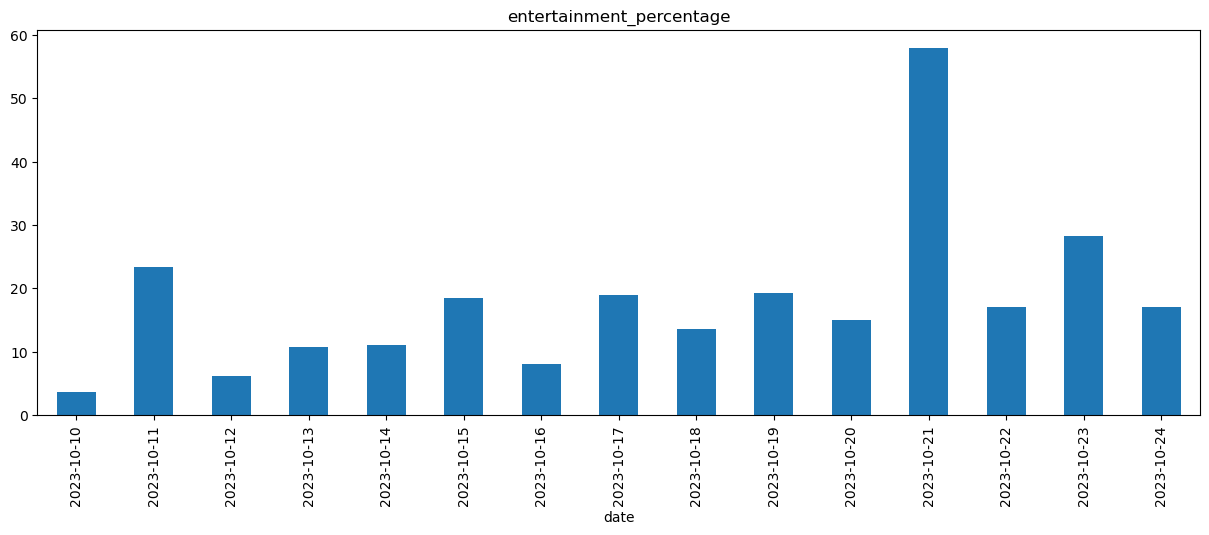

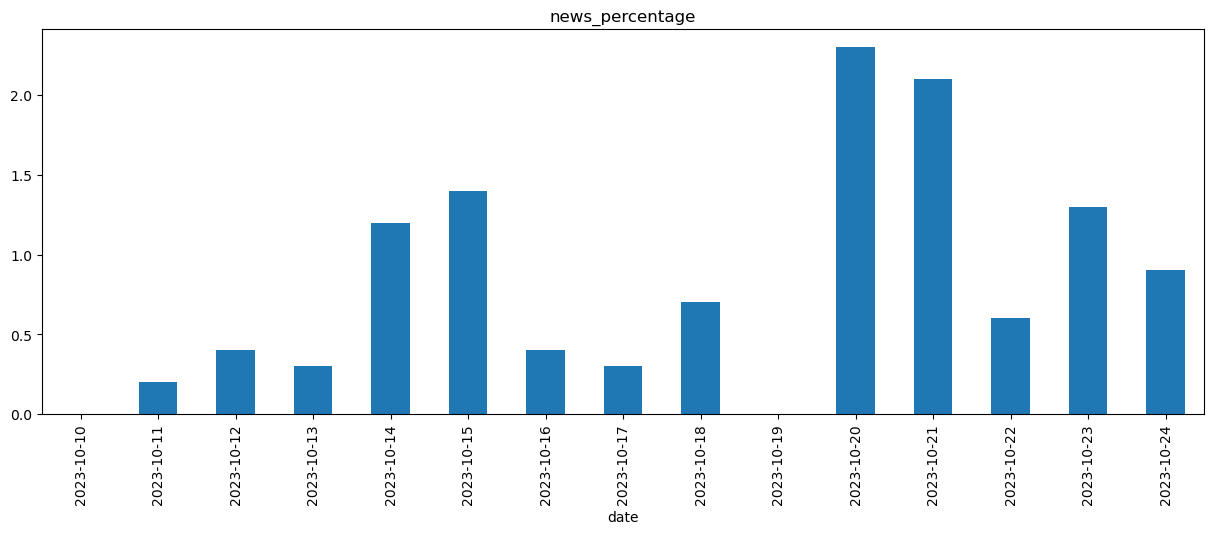

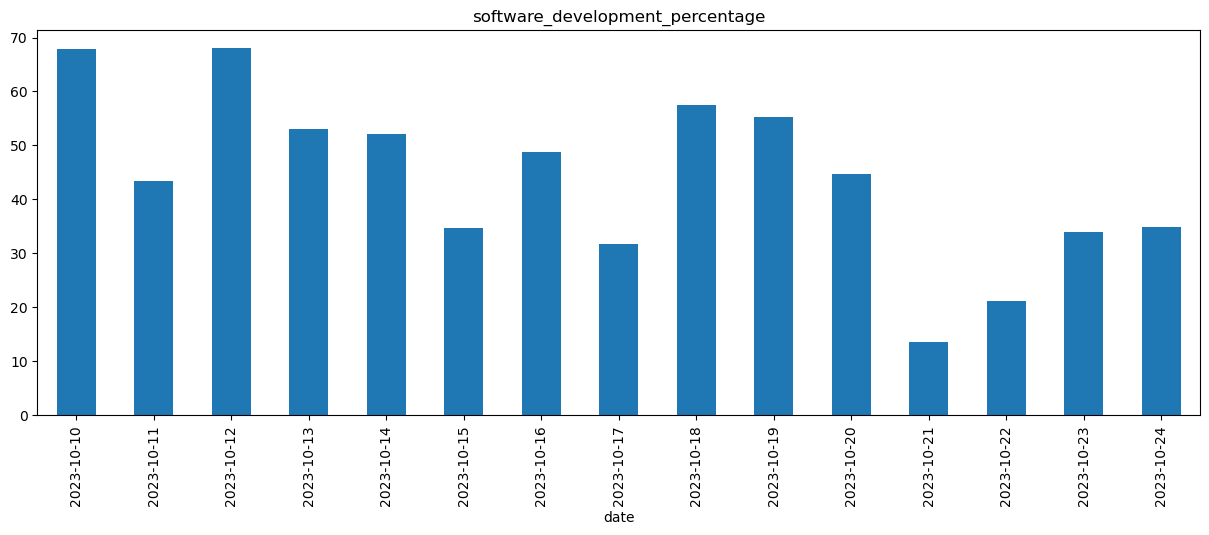

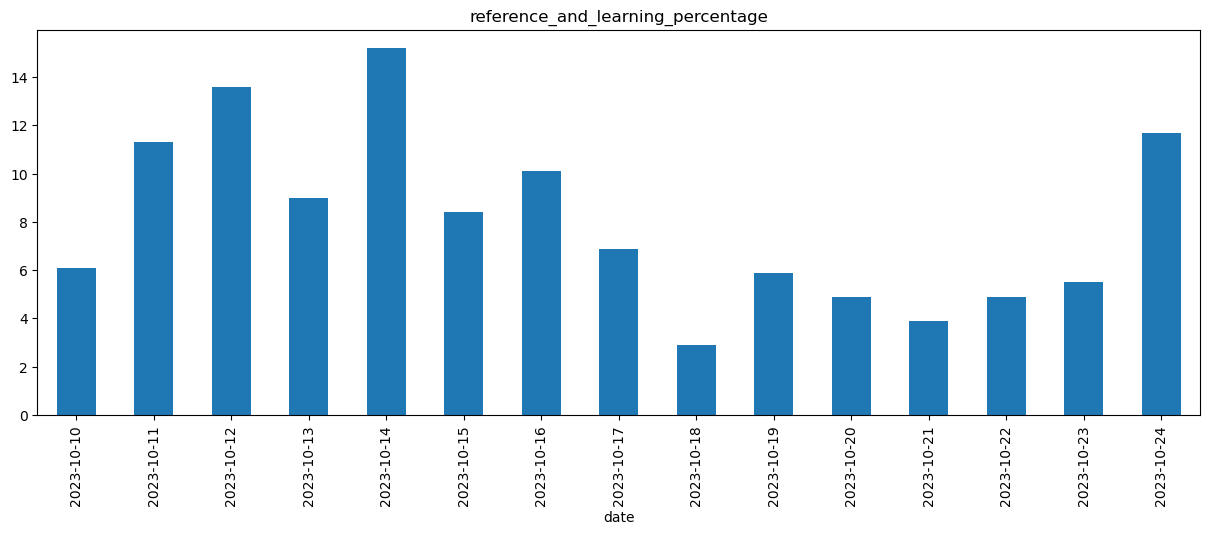

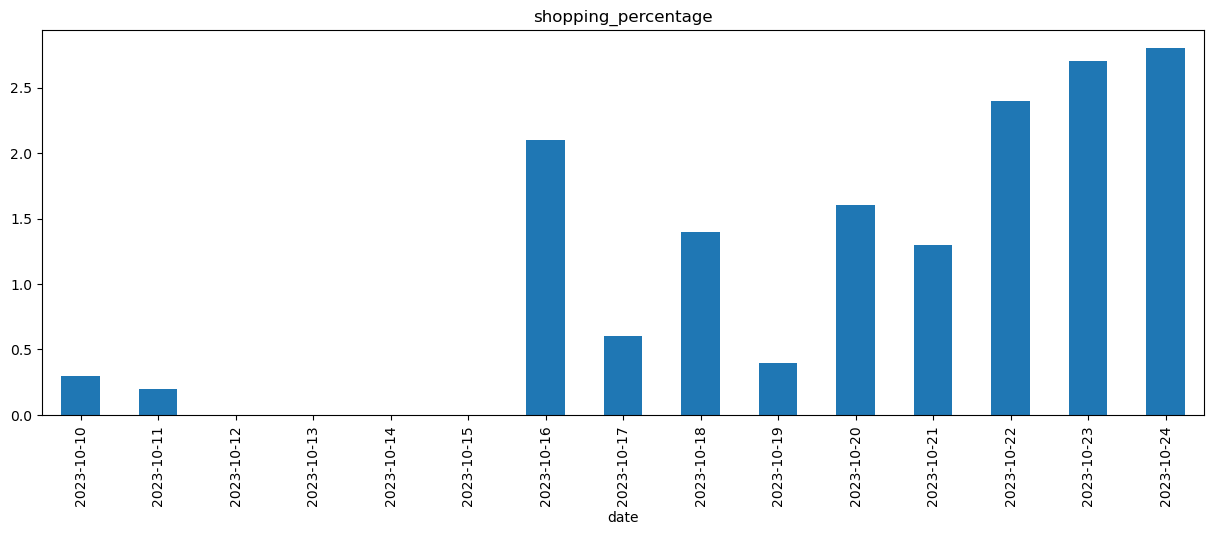

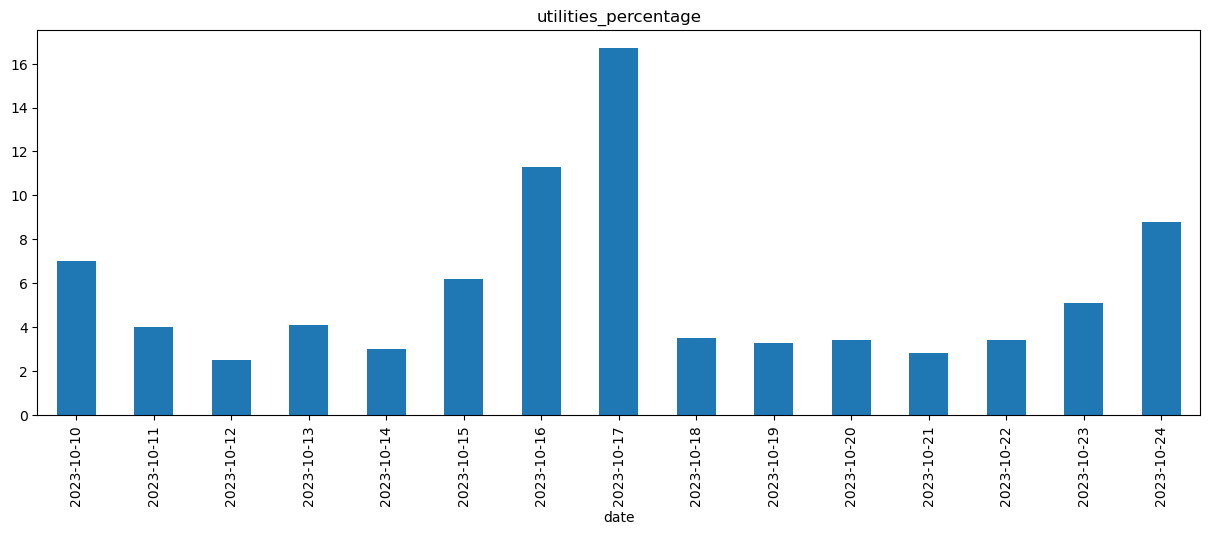

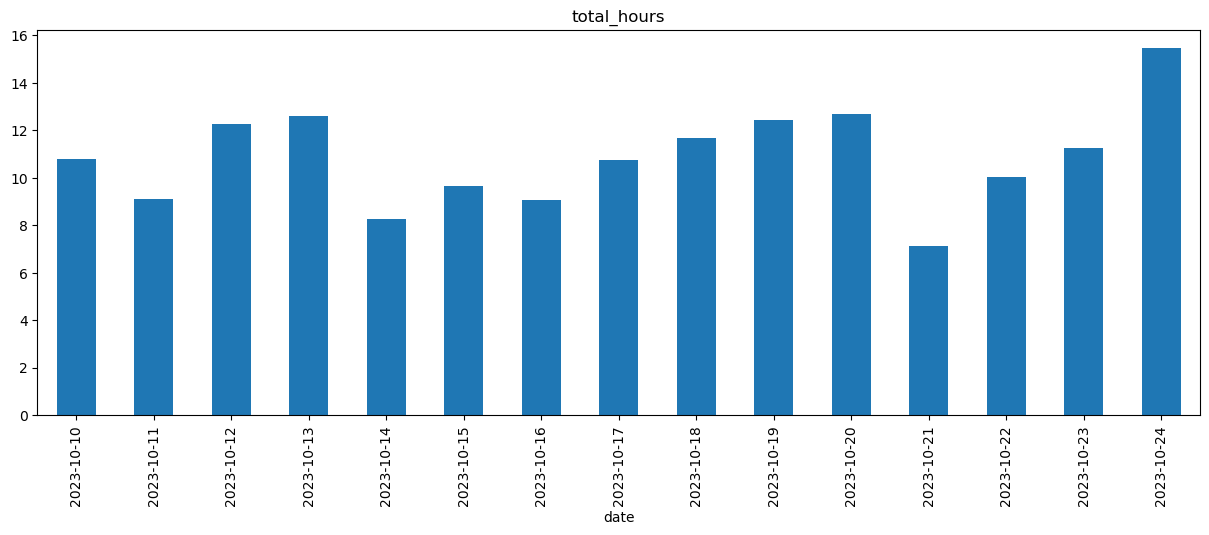

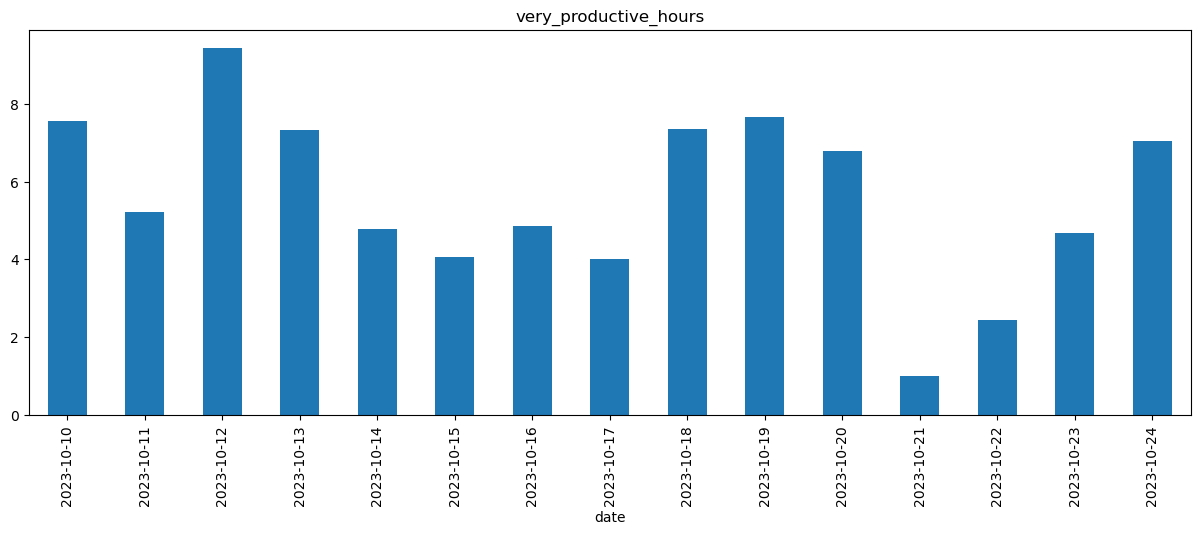

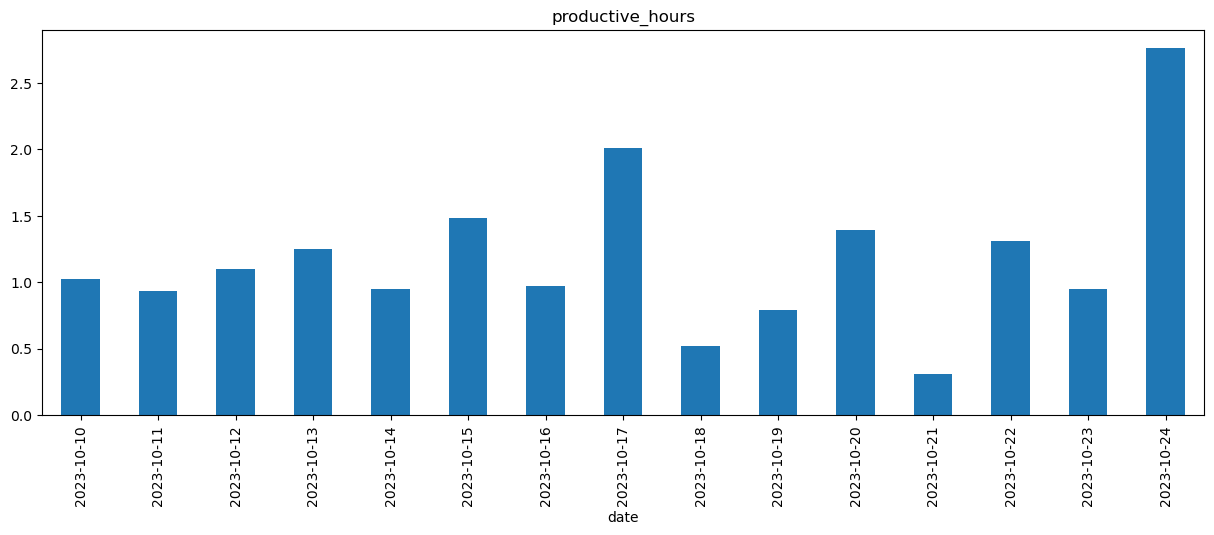

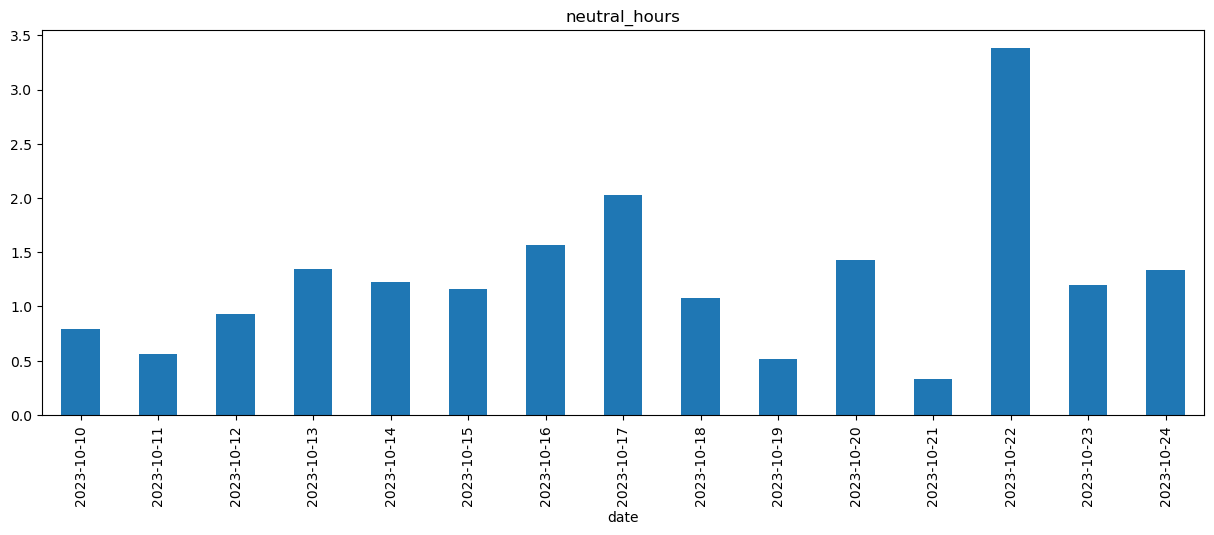

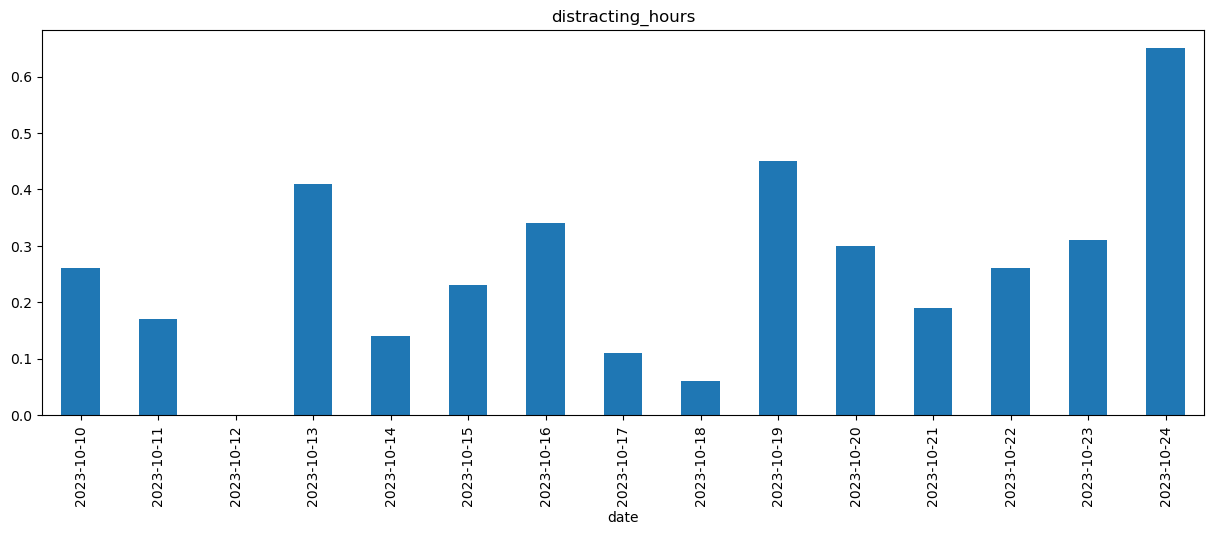

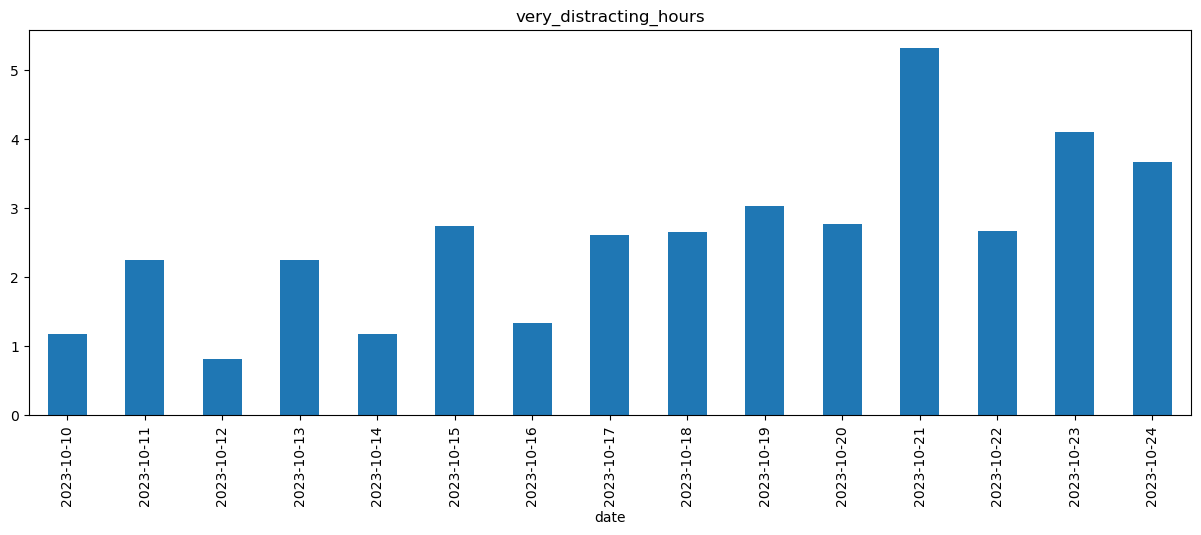

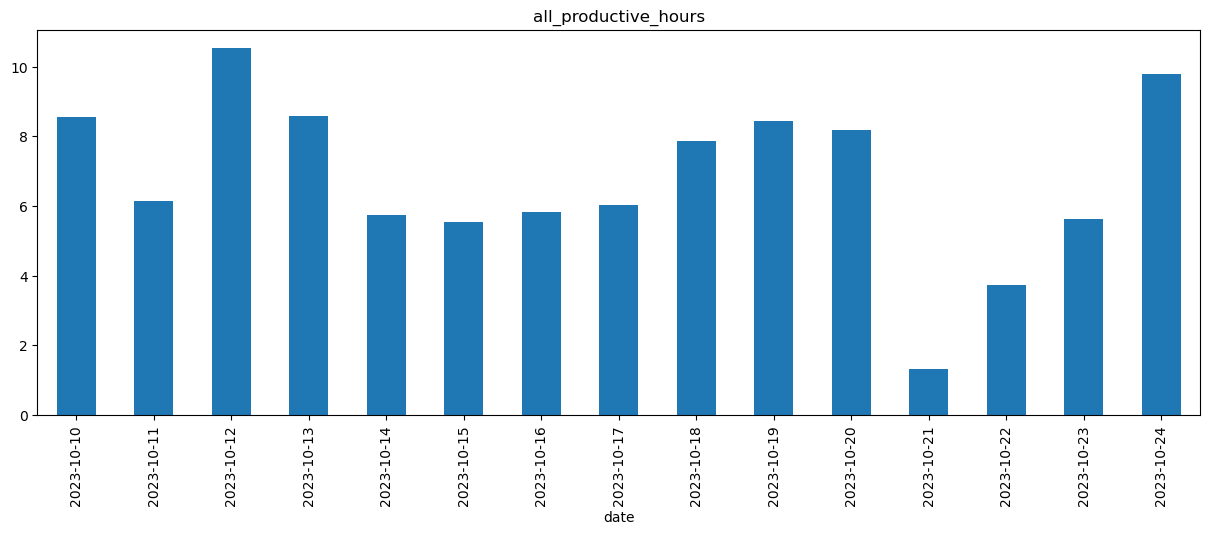

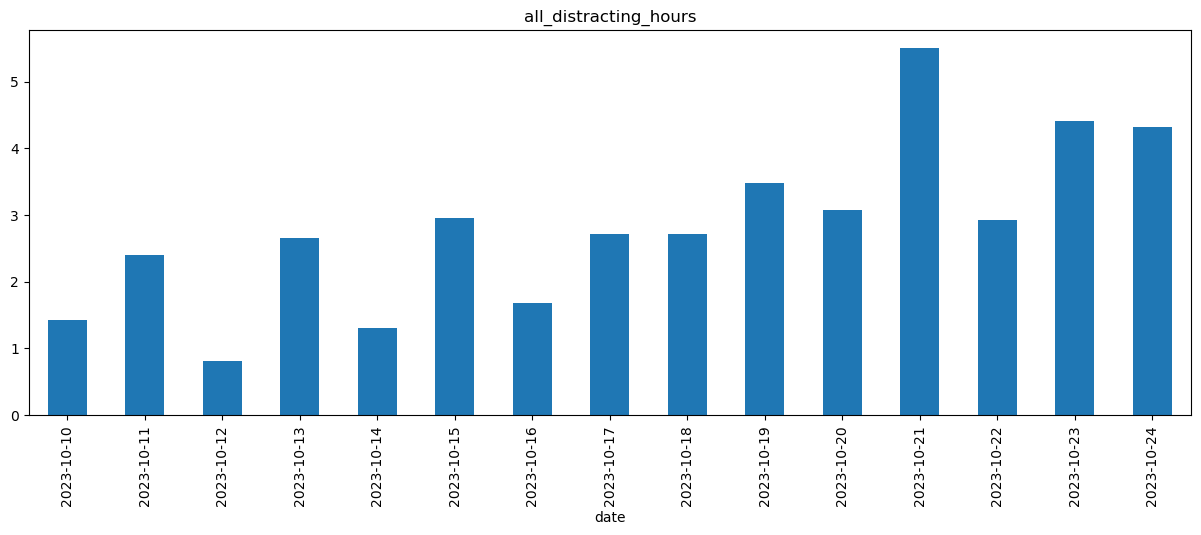

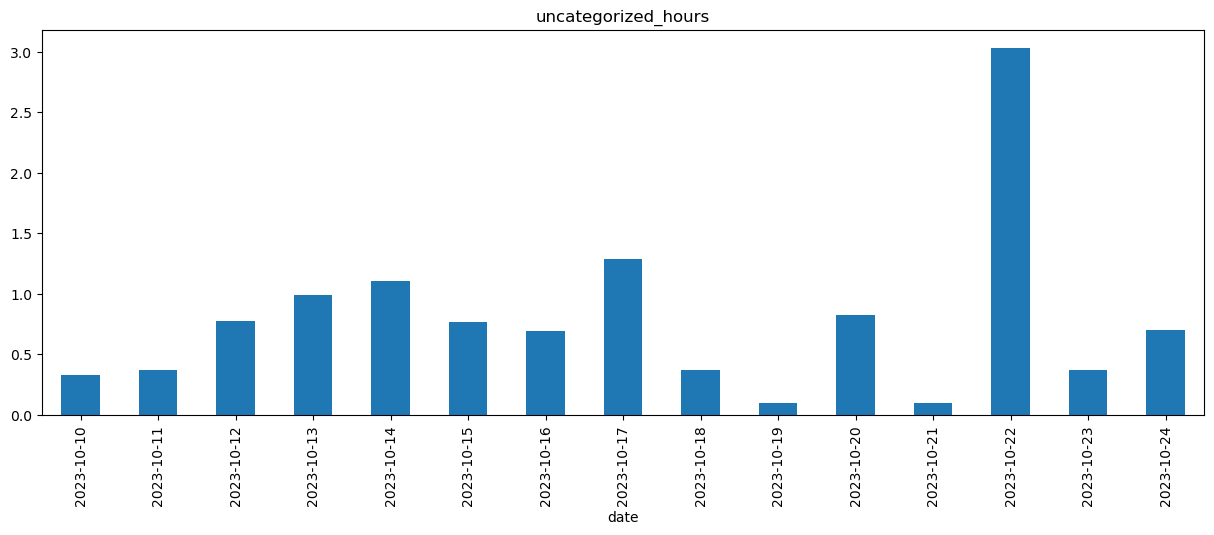

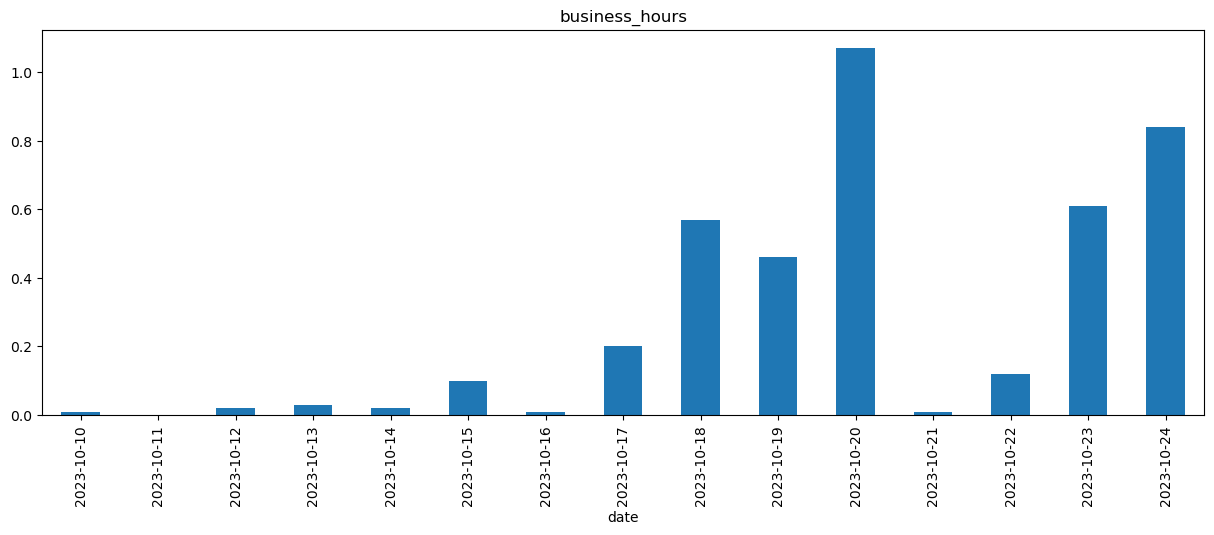

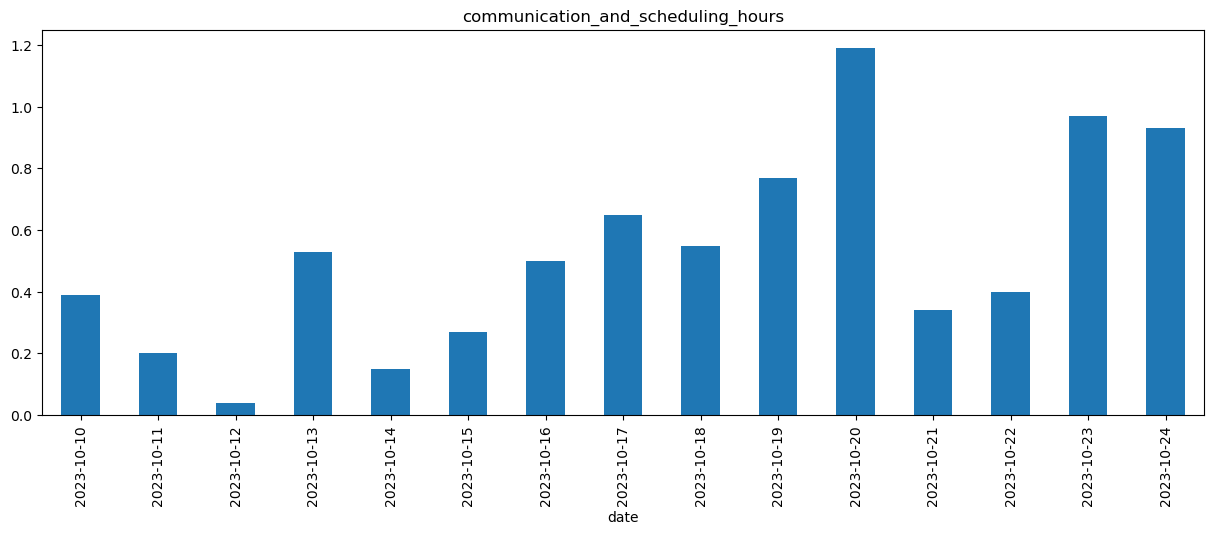

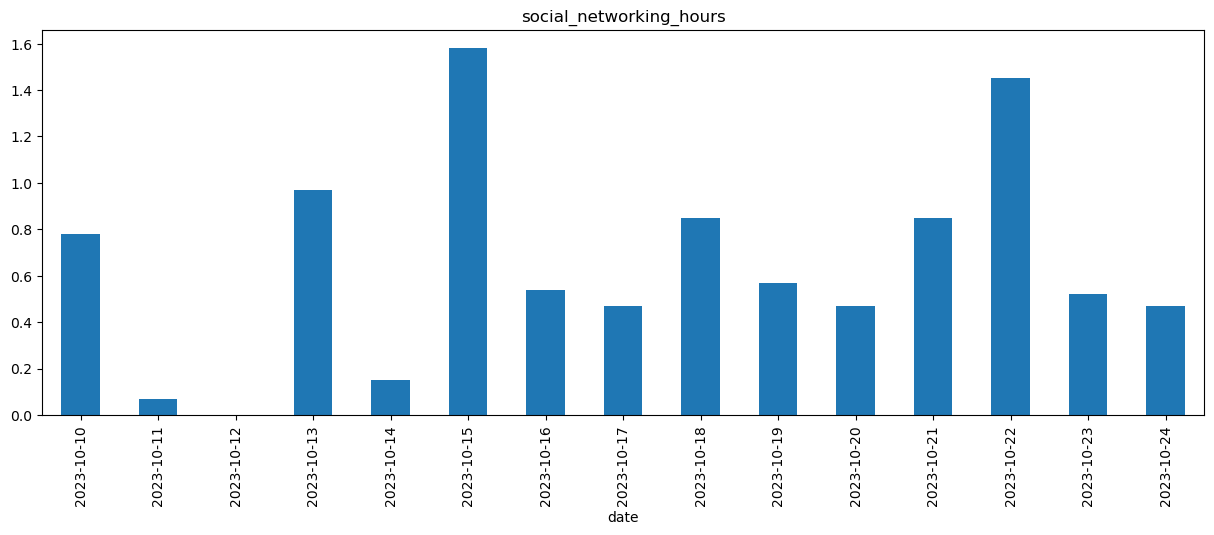

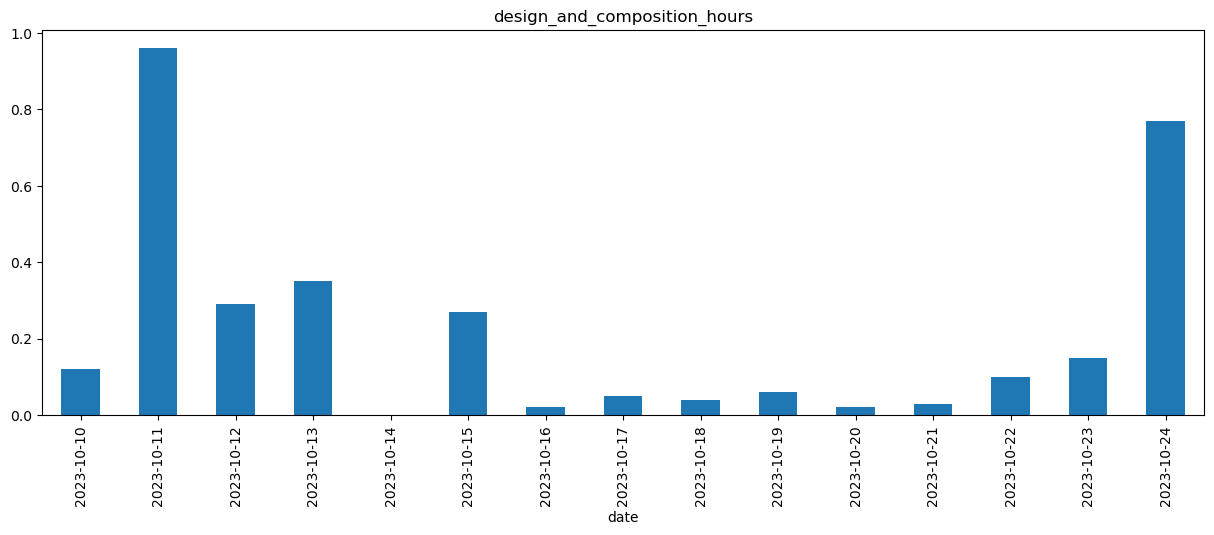

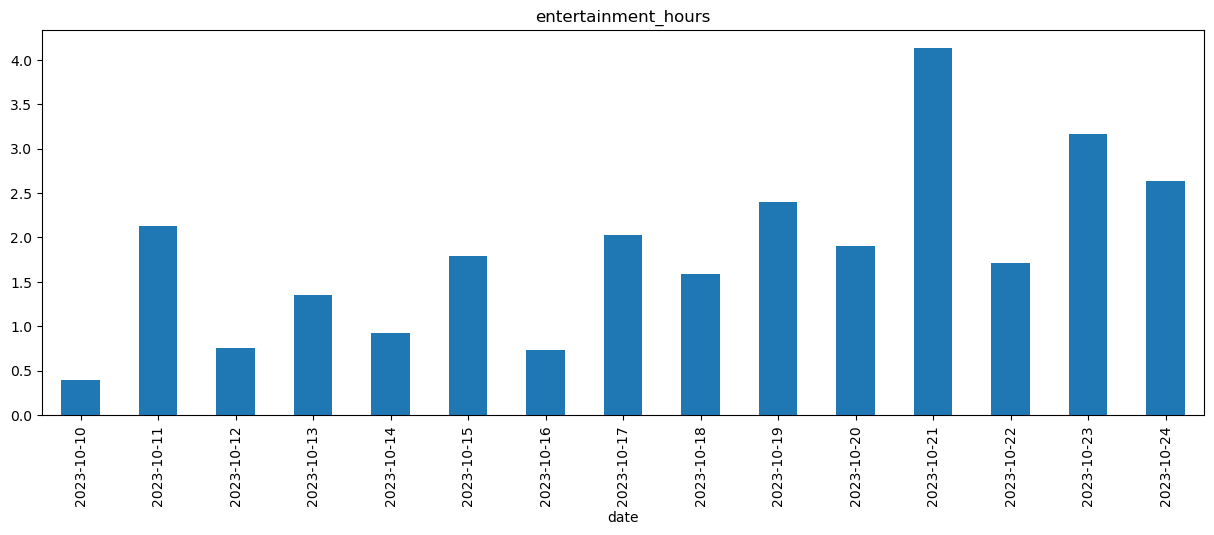

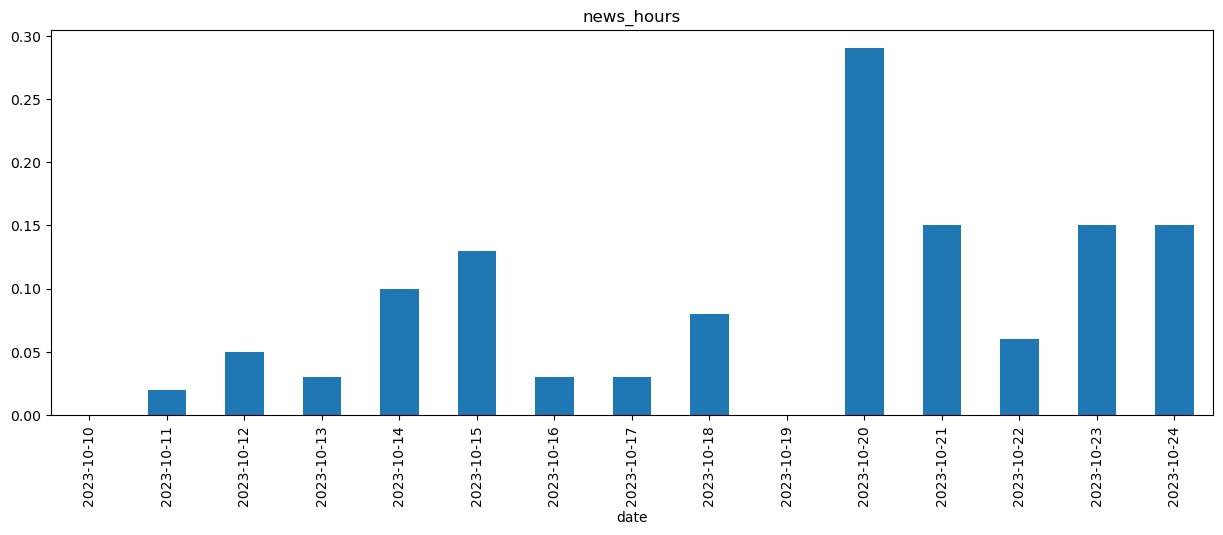

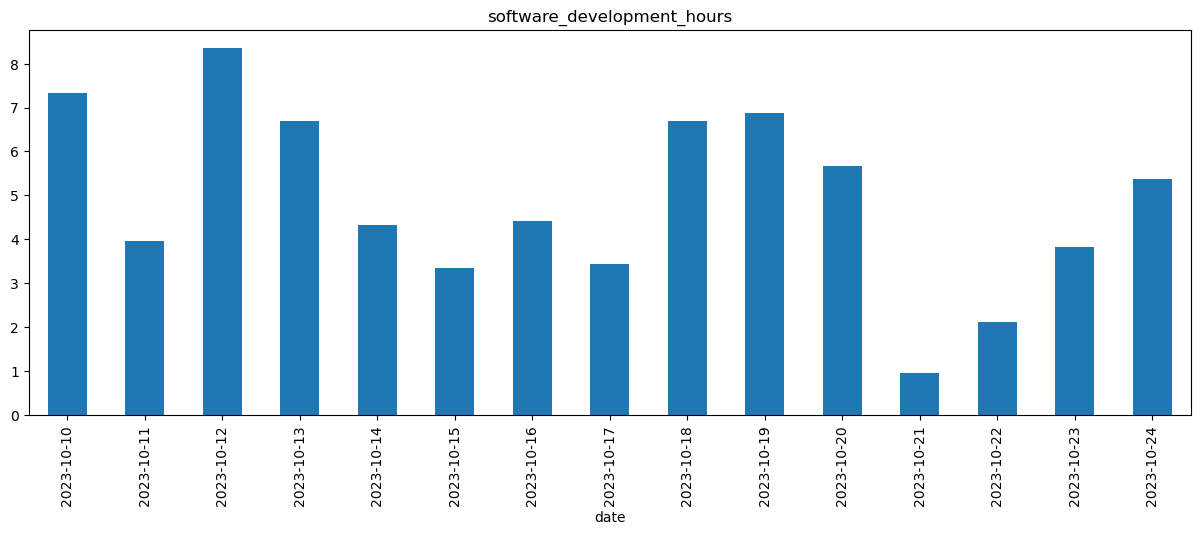

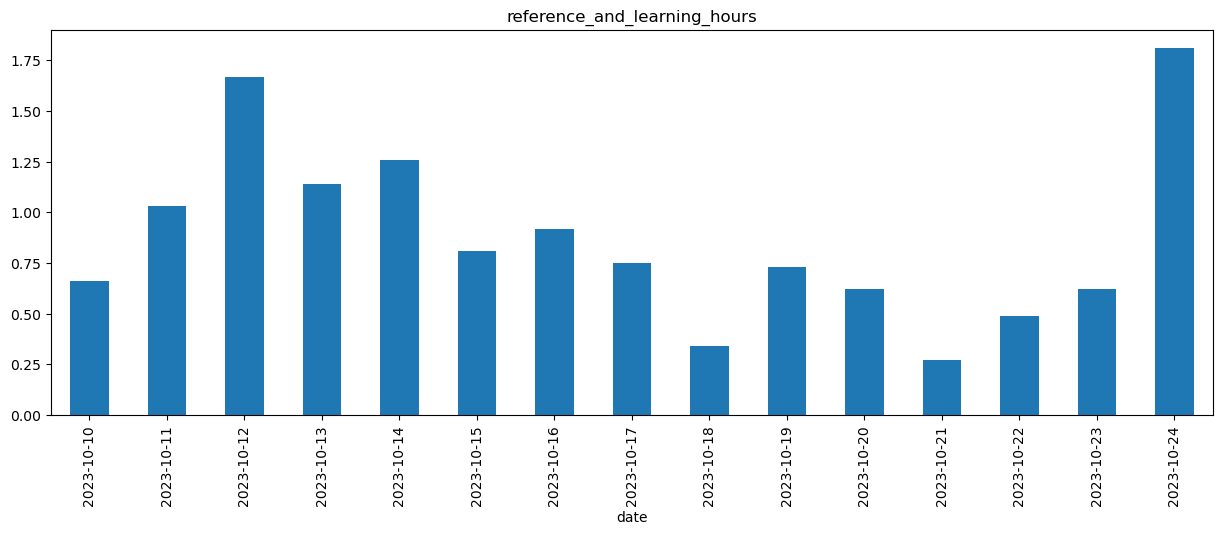

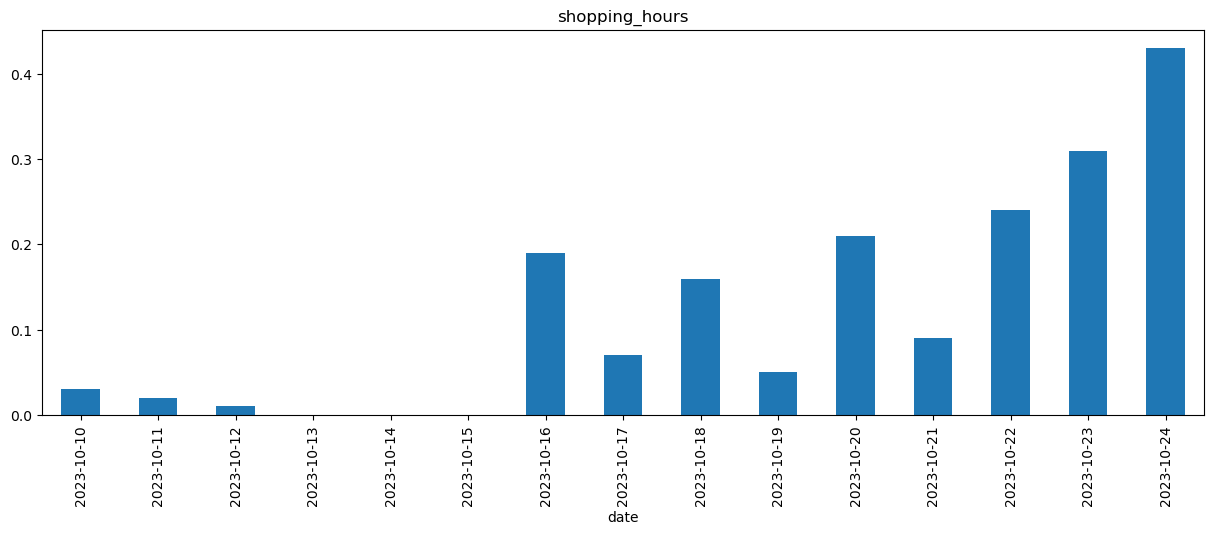

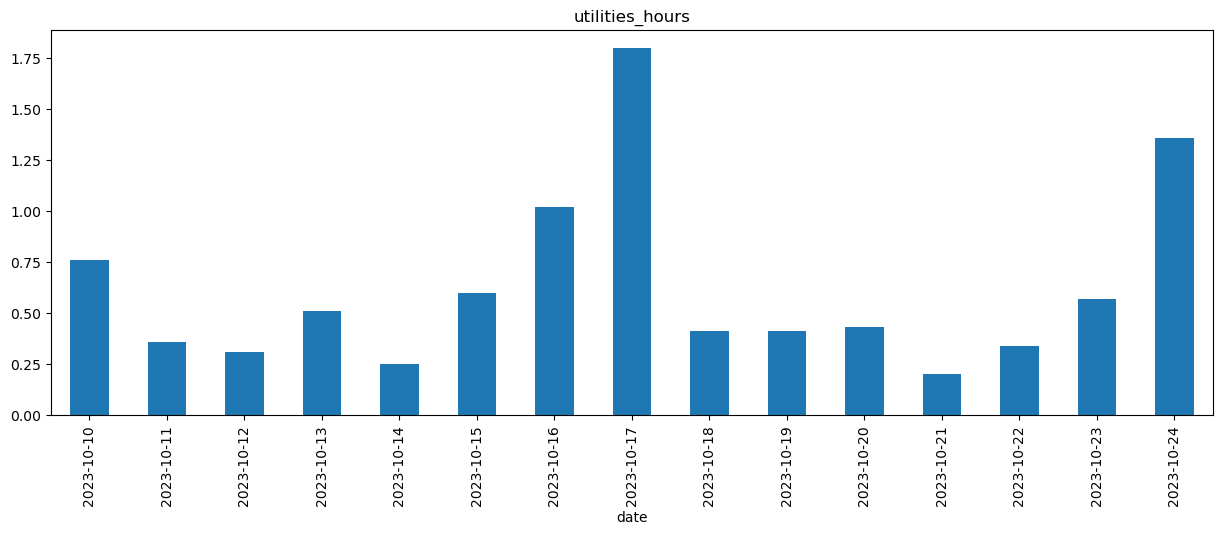

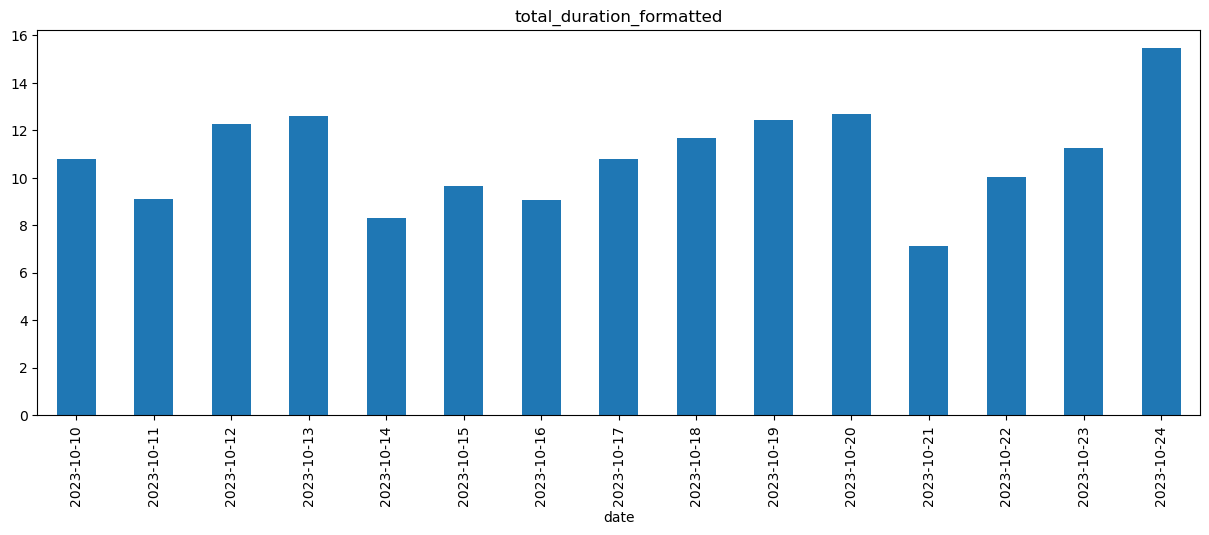

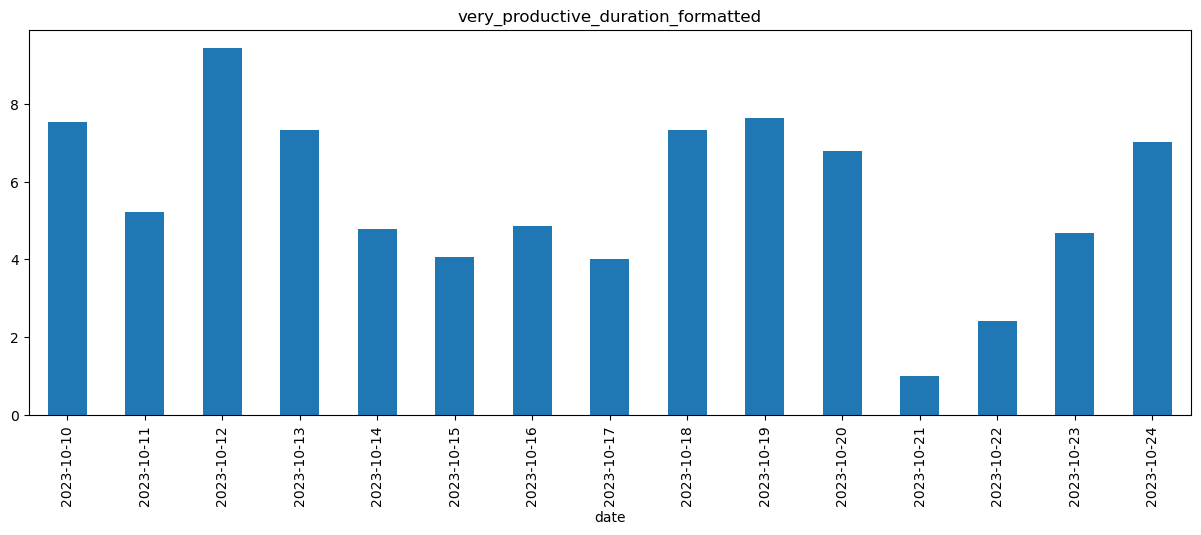

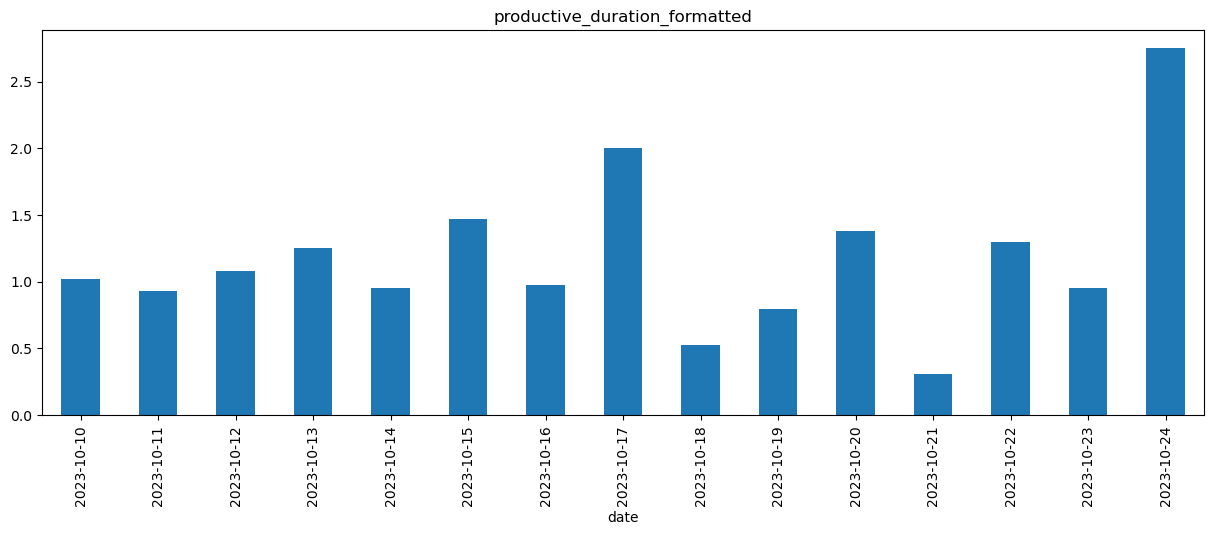

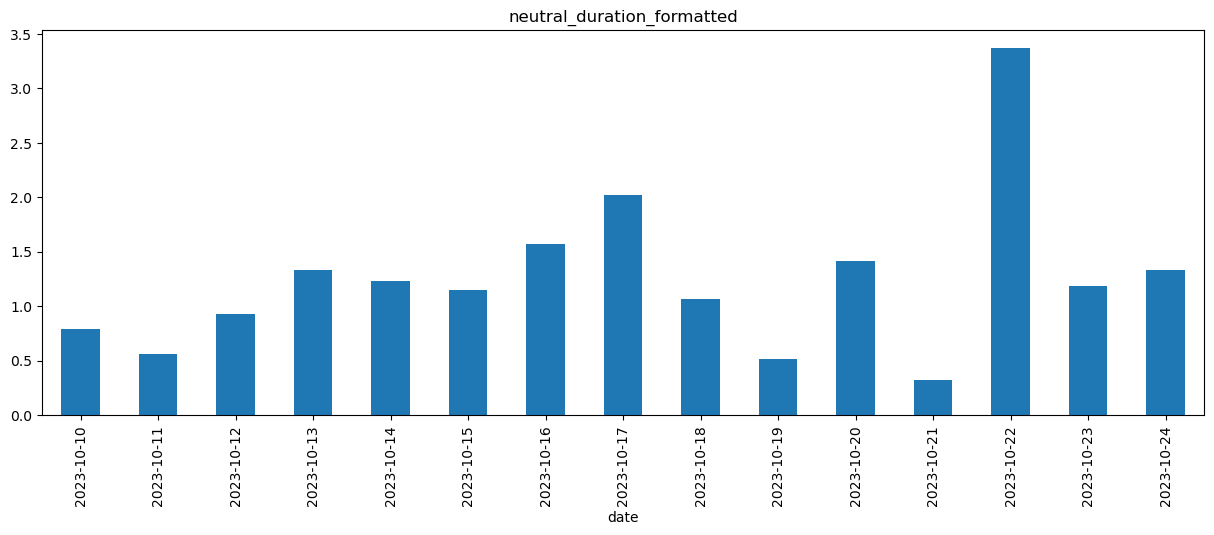

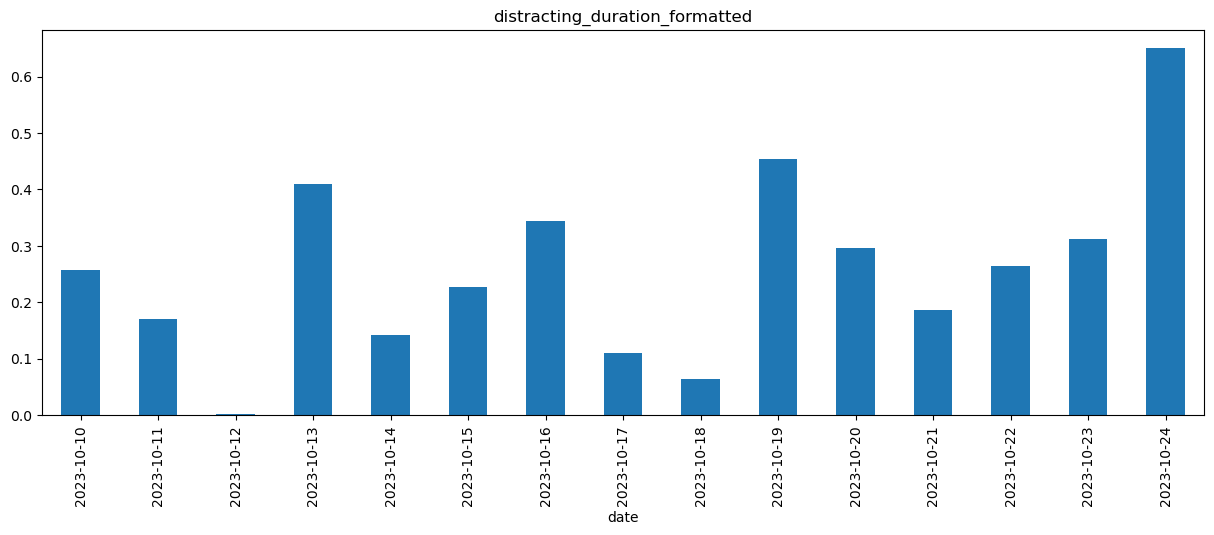

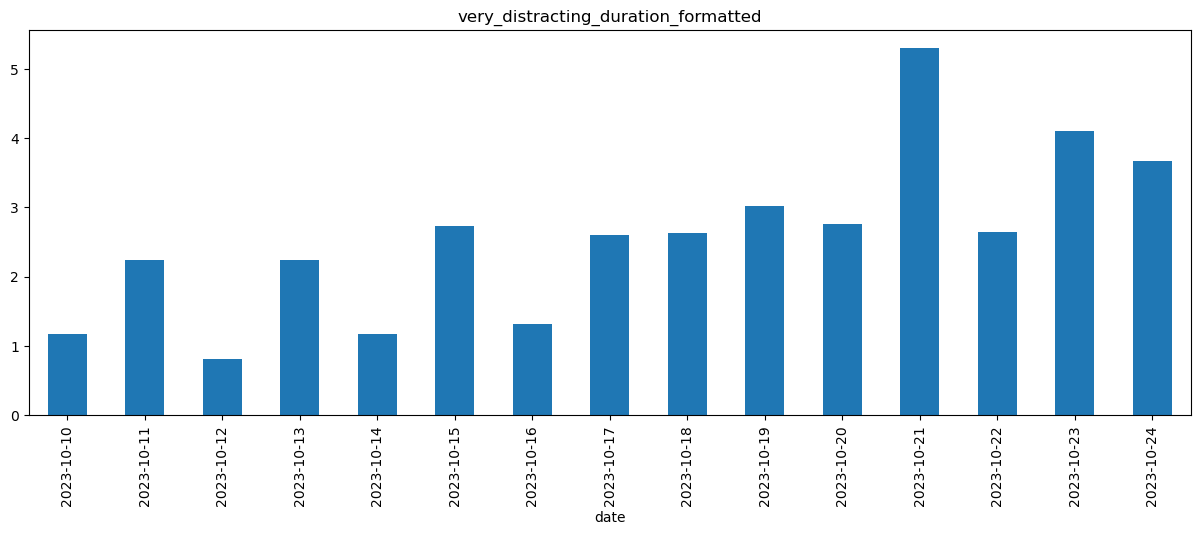

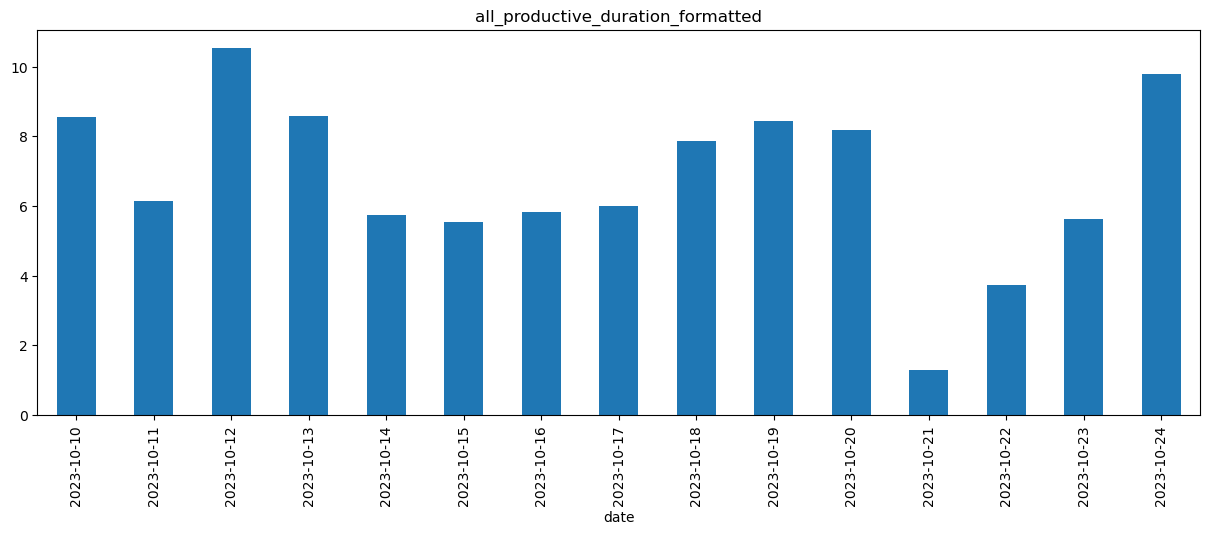

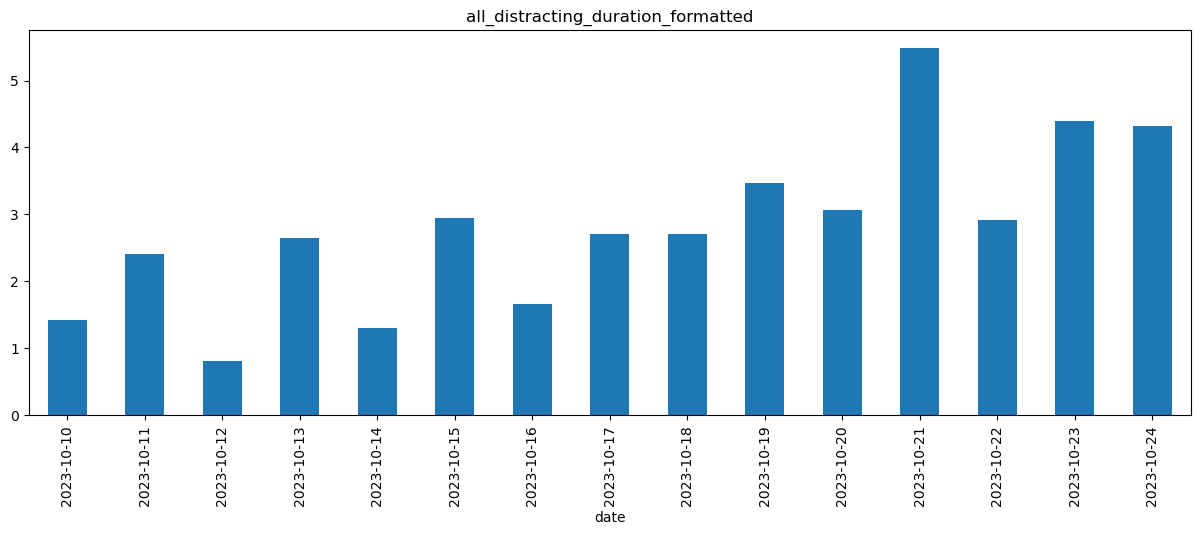

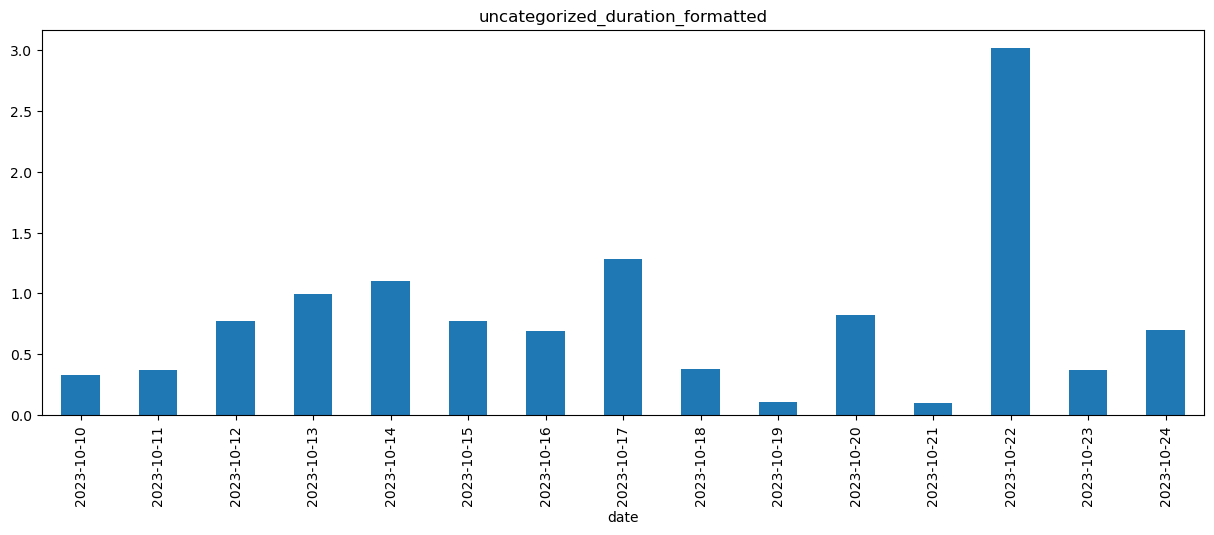

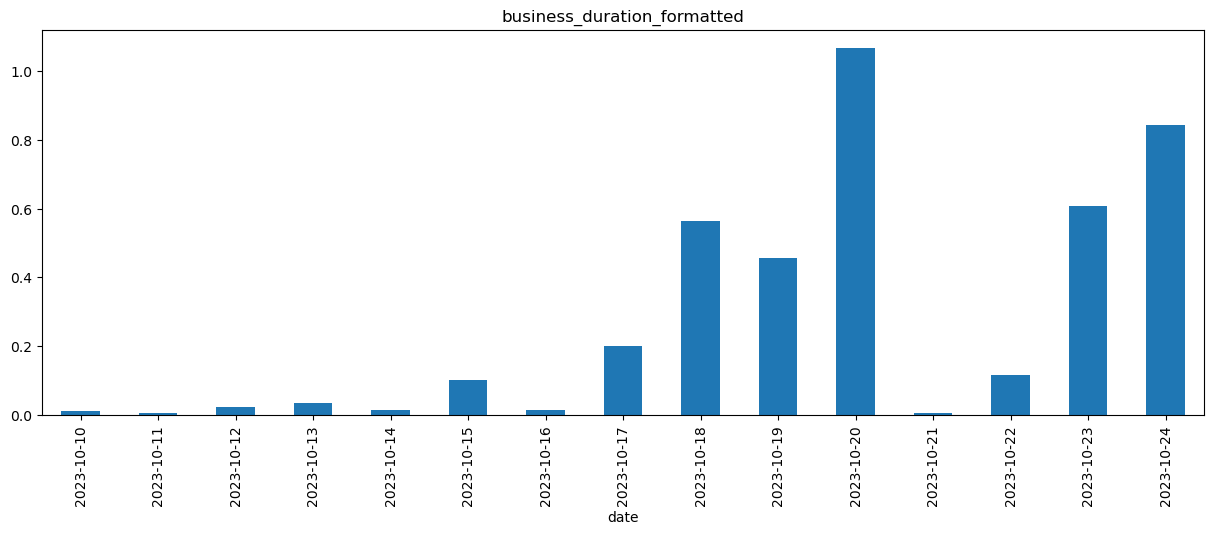

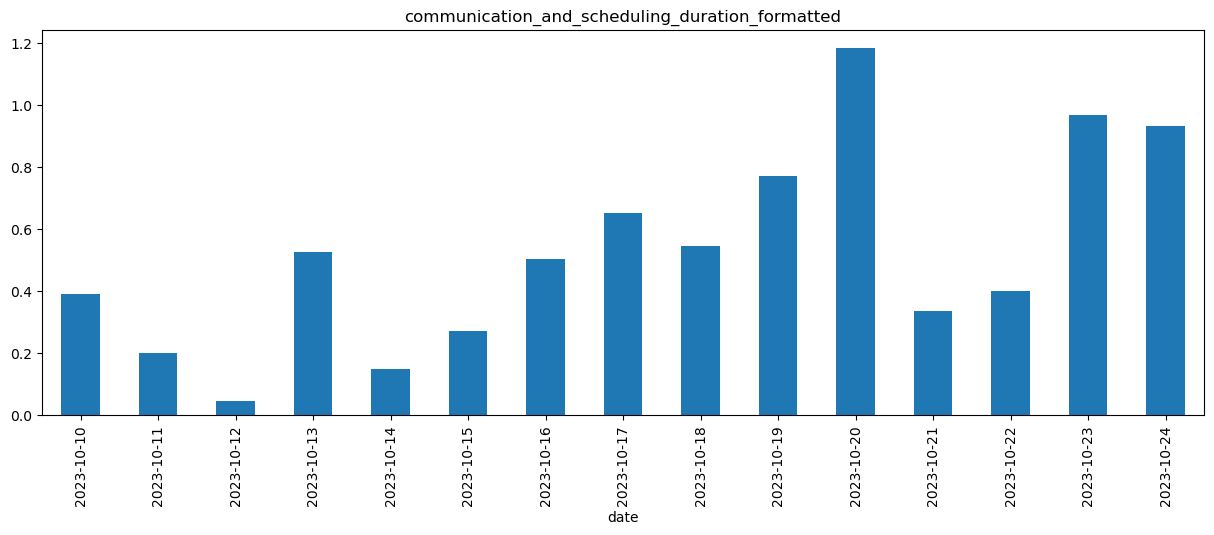

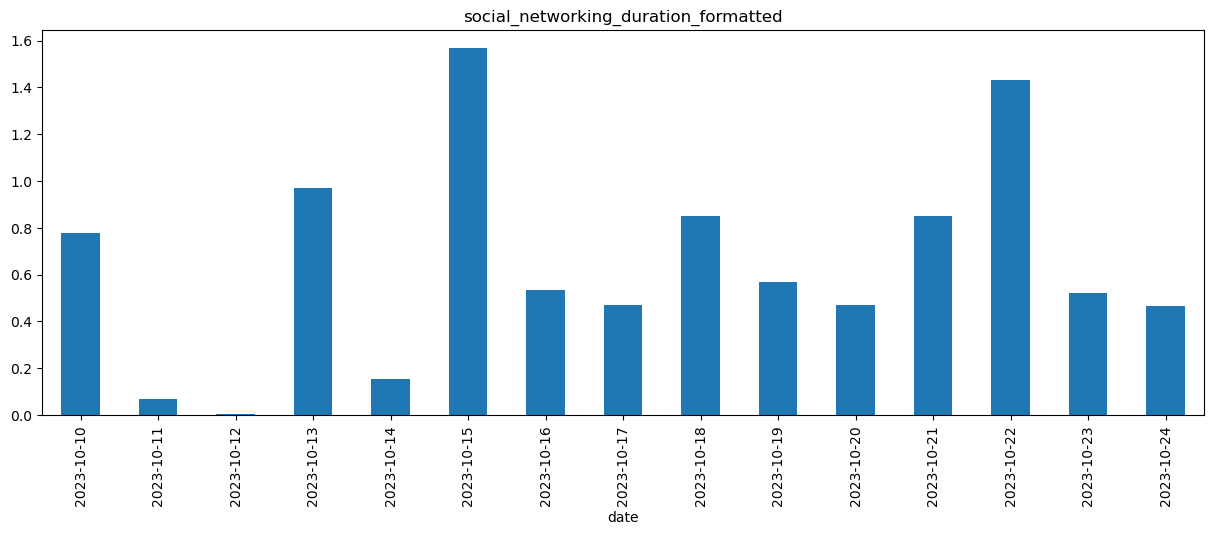

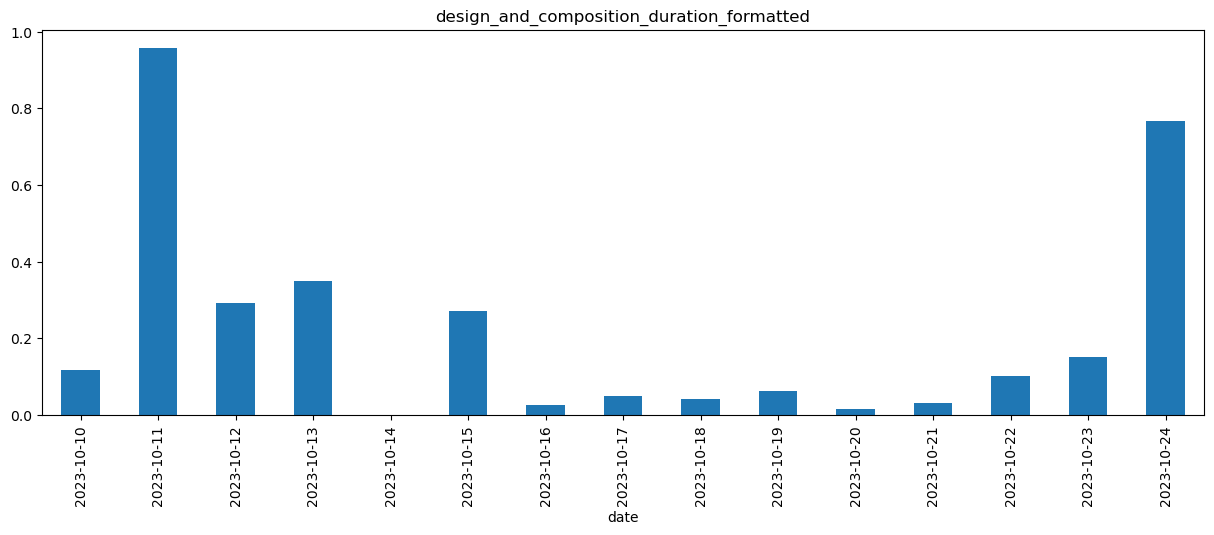

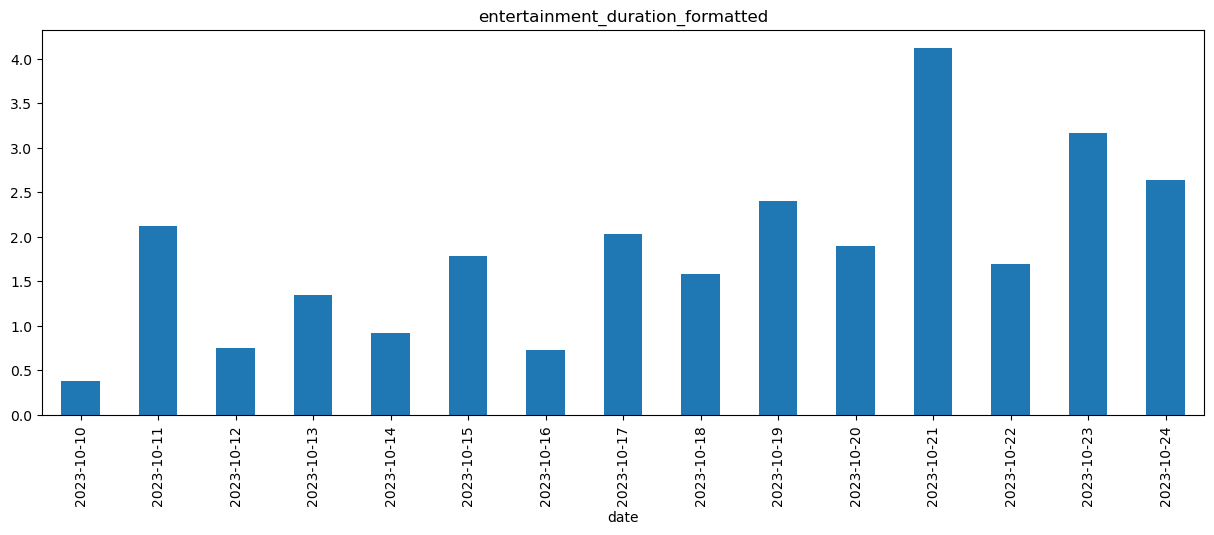

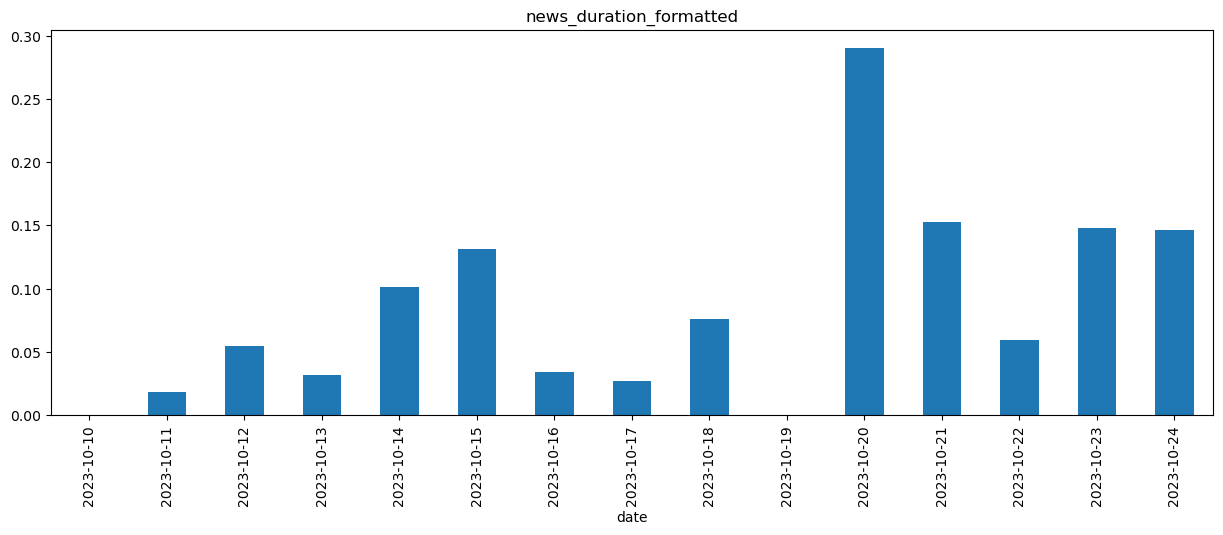

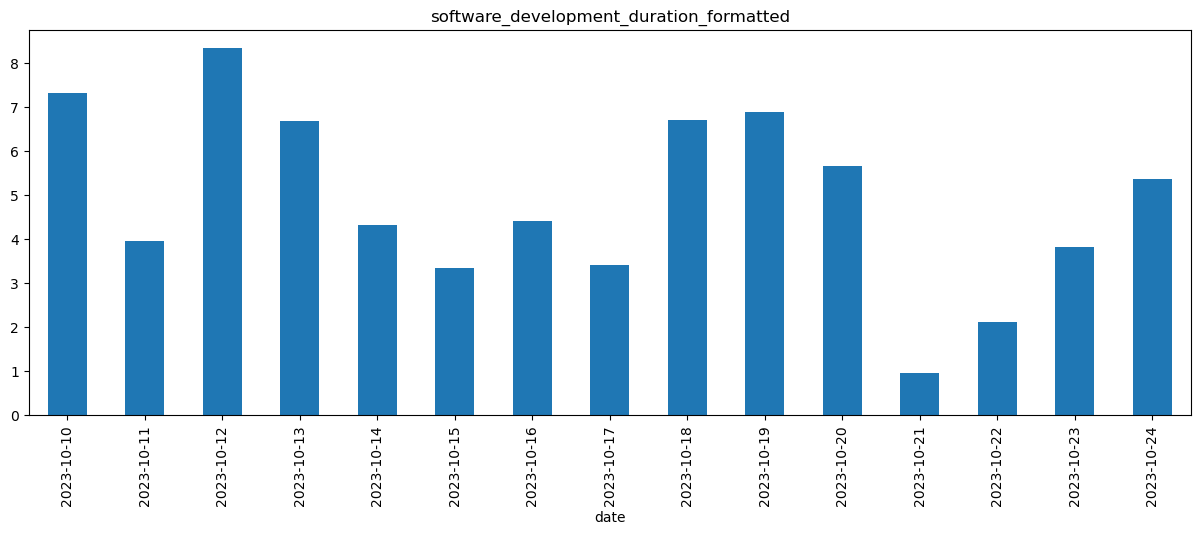

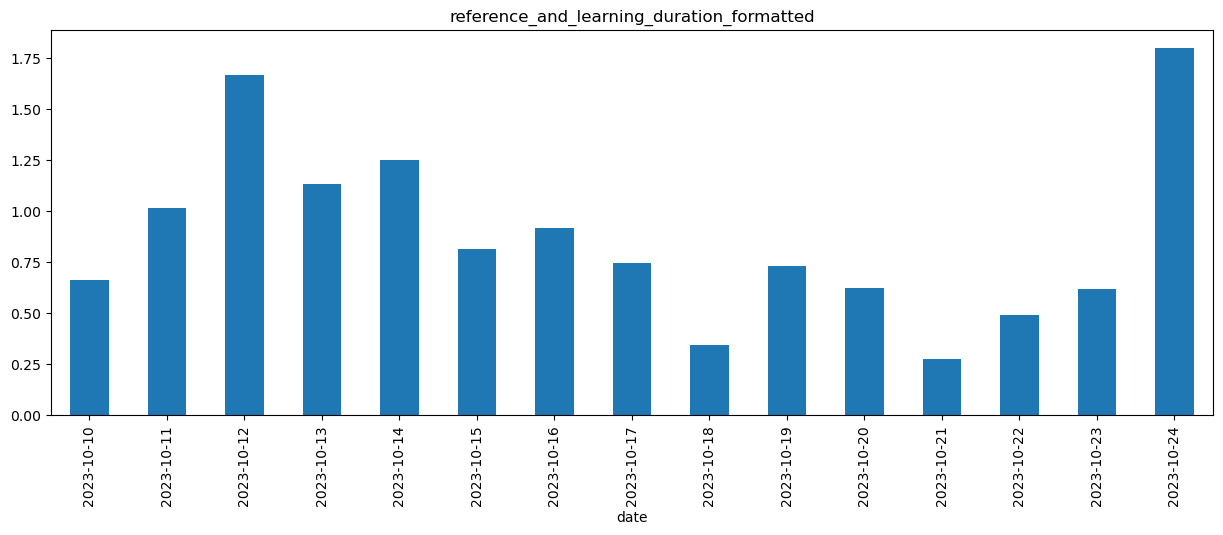

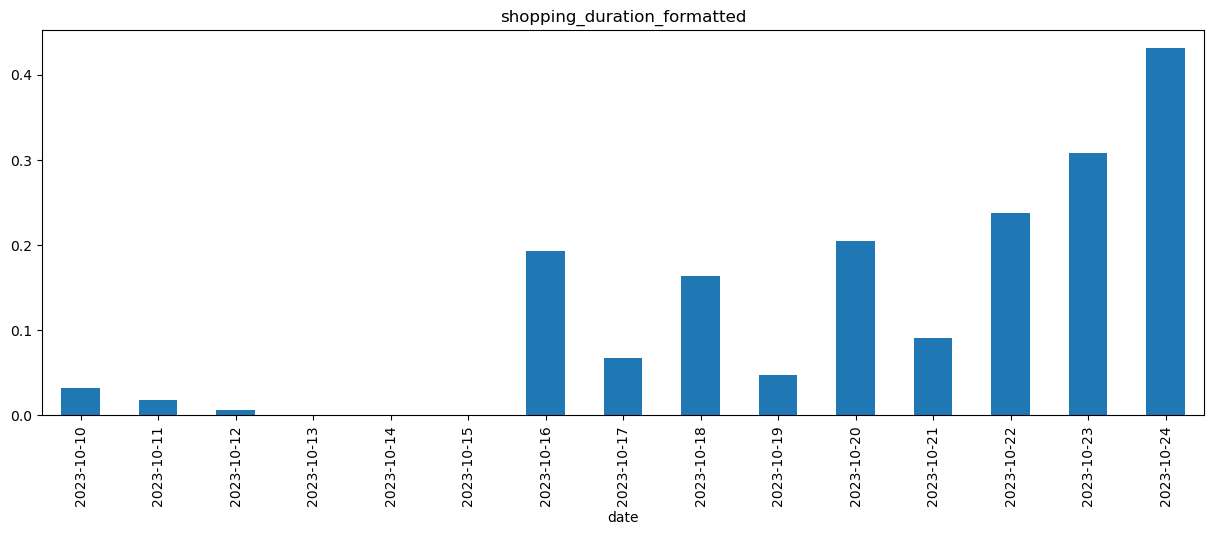

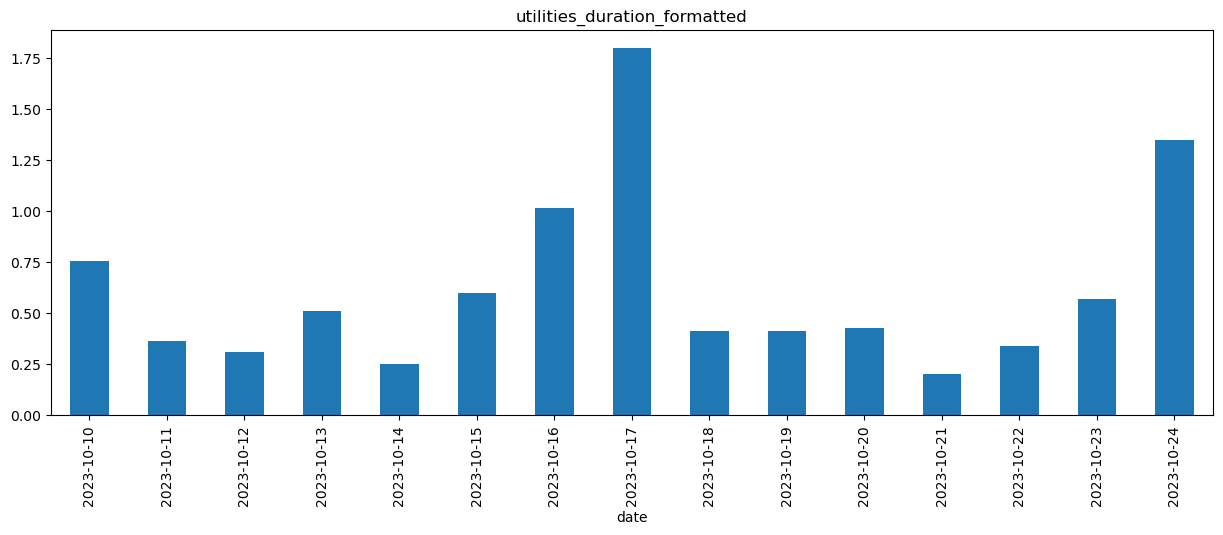

In [35]:
# for each column of the summary, bar plot the data though the days
for col in summary.columns:
    try:
        summary[col].plot(kind='bar', figsize=(15,5))
        plt.title(col)
        plt.show()
    except TypeError:
        summary[col] = summary[col].apply(time_to_hours)
        summary[col].plot(kind='bar', figsize=(15,5))
        plt.title(col)
        plt.show()

In [ ]:
summary